# <font color = green>Telecom Churn Case Study -DS C27 batch<font> 

##### <font color = green> By:<font> 
<font color = red>    **1. MOHAMMAD SHAHID RASHID**<font>     <font color = blue>     (mohammad.shahid.rashid@gmail.com) <font> <br> 
<font color = red>    **2. DHARMENDRA BUDHA**<font><font>  <font color = blue>   (dharmendra.budha@gmail.com) <font>

## <font color = green>Business problem overview<font> 

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences   <u> an average of 15-25% annual churn rate </u>   . Given the fact that  <u> it costs 5-10 times more to acquire a new customer </u>than to retain an existing one, customer retention has now become even more important than customer acquisition.

### <font color = green>Understanding and Defining Churn:</font>
There are two main models of payment in the telecom industry:
- **postpaid** (customers pay a monthly/annual bill after using the services)
- **prepaid** (customers pay/recharge with a certain amount in advance and then use the services).

In the **`postpaid model`**, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the **`prepaid model`**, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

## <font color = green>Definitions of churn<font> 

There are various ways to define churn, such as:

**Revenue-based churn:** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.
 - <u> shortcoming  </u>- There are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services.
 - <u> example </u>, many users in rural areas only receive calls from their wage-earning siblings in urban areas.
    
    
 

    
    
**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
 - <u> shortcoming  </u>- when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. 
 - <u> example </u>,if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.
    
<font color = blue> In this project, we will use the `usage-based definition` to `define churn`.  <font> 


## <font color = green>High-value churn<font> 
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers).
    
`In this project, we will define high-value customers based on a certain metric (detail below) and predict churn only on high-value customers. `


## <font color = green>Understanding the business objective and the data<font> 

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### <font color = green>Understanding  Customer Behaviour During Churn:</font>

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are **three phases** of customer lifecycle :

1. The **‘good’ phase:** In this phase, the customer is happy with the service and behaves as usual.

2. The **‘action’ phase:** The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. The **‘churn’ phase:** In this phase, the customer is said to have churned. We define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to us for prediction. Thus, after tagging churn as 1/0 based on this phase, we discard all data corresponding to this phase.

`In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.`

## <font color = green>Goal or Objective:</font>

- For many incumbent operators, retaining high profitable customers is the number one business goal.
- To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn.**
- The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.
- Understand the customer behaviour during churn.
- Build a predictive models to identify customers at high risk of churn and identify the main indicators of churn. 
    - Model will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By  
      knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
    - Model will be used to identify important variables that are strong predictors of churn. These variables may also indicate 
      why customers choose to switch to other networks.

### Key points:

1. We will use the **usage-based definition** to define churn.
2. This project is based on the Indian and Southeast Asian market.
3. We will define high-value customers based on a certain metric and predict churn only on high-value customers.
4. Since we are working over a four-month window, 
    - The first two months are the ‘good’ phase
    - The third month is the ‘action’ phase
    - The fourth month is the ‘churn’ phase.
    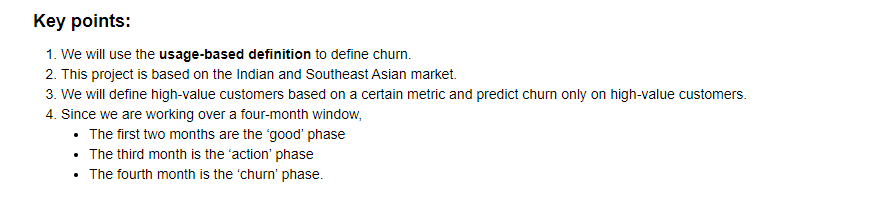

### <font color = "maroon">Case Study Workflow</font>

The solution is divided into the following sections: 

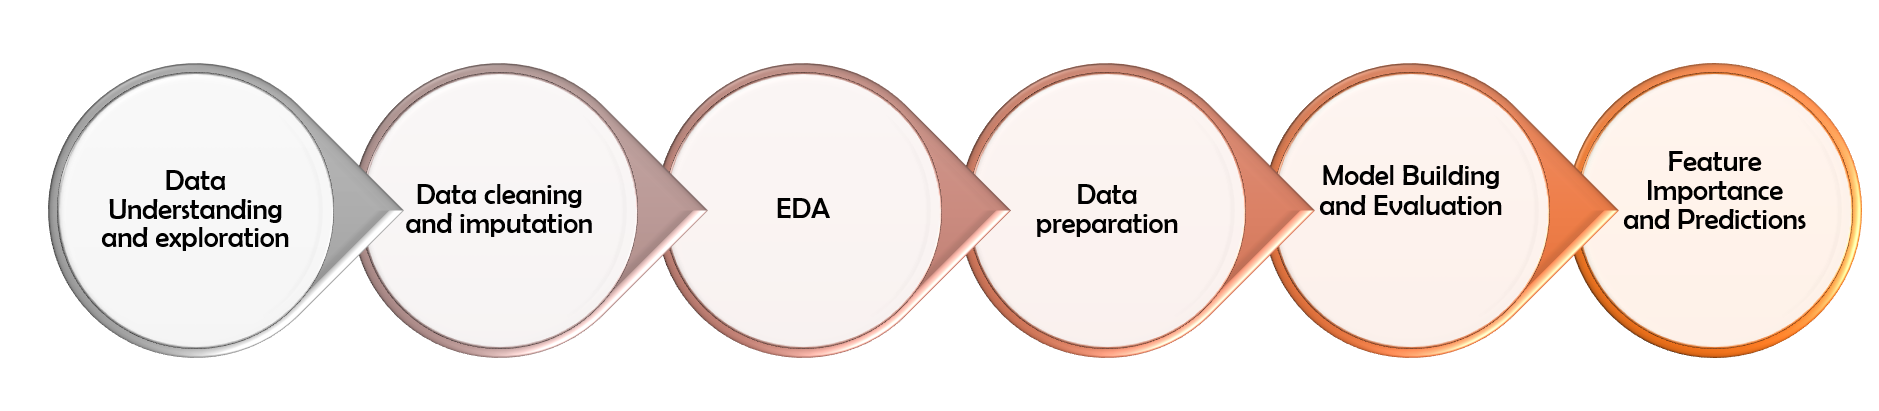


### <font color = "red">1. Data Understanding and exploration</font>


         

In [102]:
# Supress Warnings

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

In [103]:
# Import the numpy and pandas package
import os

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_colwidth', -1) # make sure data and columns are displayed correctly withput purge
#pd.options.display.float_format = '{:20,.2f}'.format # display float value with correct precision 

#Visualising
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(15,10)})

import math
from IPython.display import Markdown, display ,HTML

In [104]:
import time

 

#Added reference for Logistic Regression, Cross Validation, PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

#Adding reference for Decision Tree, RandomSearch CV, RandomForest, GradientBoosting 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

 

#Added Metrics
from sklearn import linear_model, metrics
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

#increasing max number of columns and rows displayed with pandas.
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

## load the data set <font color = "blue">telecom_churn_data.csv </font> file

In [105]:
#importing dataset to csv

tel=pd.read_csv(r"E:\Upgrad\Masters Program in Data Science\3. Machine Learning II\9. Telecom churn case study/telecom_churn_data.csv")
tel.head()

mobile_number  circle_id       loc_og_t2o_mou       std_og_t2o_mou  \
0  7000842753     109                       0.00                 0.00   
1  7001865778     109                       0.00                 0.00   
2  7001625959     109                       0.00                 0.00   
3  7001204172     109                       0.00                 0.00   
4  7000142493     109                       0.00                 0.00   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.00  6/30/2014            7/31/2014             
1                 0.00  6/30/2014            7/31/2014             
2                 0.00  6/30/2014            7/31/2014             
3                 0.00  6/30/2014            7/31/2014             
4                 0.00  6/30/2014            7/31/2014             

  last_date_of_month_8 last_date_of_month_9               arpu_6  \
0  8/31/2014            9/30/2014                         197.38   
1  8/31/2014            9/30/2014                          34.05   
2  8/31/2014            9/30/2014                         167.69   
3  8/31/2014            9/30/2014                         221.34   
4  8/31/2014            9/30/2014                         261.64   

                arpu_7               arpu_8               arpu_9  \
0               214.82               213.80                21.10   
1               355.07               268.32                86.28   
2               189.06               210.23               290.71   
3               251.10               508.05               389.50   
4               309.88               238.17               163.43   

           onnet_mou_6          onnet_mou_7          onnet_mou_8  \
0                  nan                  nan                 0.00   
1                24.11                78.68                 7.68   
2                11.54                55.24                37.26   
3                99.91                54.39               310.98   
4                50.31               149.44                83.89   

           onnet_mou_9         offnet_mou_6         offnet_mou_7  \
0                  nan                  nan                  nan   
1                18.34                15.74                99.84   
2                74.81               143.33               220.59   
3               241.71               123.31               109.01   
4                58.78                76.96                91.88   

          offnet_mou_8         offnet_mou_9        roam_ic_mou_6  \
0                 0.00                  nan                  nan   
1               304.76                53.76                 0.00   
2               208.36               118.91                 0.00   
3                71.68               113.54                 0.00   
4               124.26                45.81                 0.00   

         roam_ic_mou_7        roam_ic_mou_8        roam_ic_mou_9  \
0                  nan                 0.00                  nan   
1                 0.00                 0.00                 0.00   
2                 0.00                 0.00                38.49   
3                54.86                44.38                 0.00   
4                 0.00                 0.00                 0.00   

         roam_og_mou_6        roam_og_mou_7        roam_og_mou_8  \
0                  nan                  nan                 0.00   
1                 0.00                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                28.09                39.04   
4                 0.00                 0.00                 0.00   

         roam_og_mou_9     loc_og_t2t_mou_6     loc_og_t2t_mou_7  \
0                  nan                  nan                  nan   
1                 0.00                23.88                74.56   
2                70.94                 7.19                28.74   
3                 0.

In [106]:
#Check the shape of dataframes
print("No. of Rows and Columns in telecom DataFrame:", tel.shape)

No. of Rows and Columns in telecom DataFrame: (99999, 226)


In [107]:
#Check Metadata using info() of DataFrame
print("Metadata of DataFrame:\n")
tel.info(verbose=1)

Metadata of DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  off

In [108]:
#Describe the data of telecom dataframe
tel.describe(include='all')

mobile_number            circle_id       loc_og_t2o_mou  \
count             99,999.00            99,999.00            98,981.00   
unique                  nan                  nan                  nan   
top                     nan                  nan                  nan   
freq                    nan                  nan                  nan   
mean       7,001,207,270.39               109.00                 0.00   
std              695,669.39                 0.00                 0.00   
min        7,000,000,074.00               109.00                 0.00   
25%        7,000,606,232.50               109.00                 0.00   
50%        7,001,204,632.00               109.00                 0.00   
75%        7,001,812,030.50               109.00                 0.00   
max        7,002,410,905.00               109.00                 0.00   

             std_og_t2o_mou       loc_ic_t2o_mou last_date_of_month_6  \
count             98,981.00            98,981.00  99999                 
unique                  nan                  nan  1                     
top                     nan                  nan  6/30/2014             
freq                    nan                  nan  99999                 
mean                   0.00                 0.00  NaN                   
std                    0.00                 0.00  NaN                   
min                    0.00                 0.00  NaN                   
25%                    0.00                 0.00  NaN                   
50%                    0.00                 0.00  NaN                   
75%                    0.00                 0.00  NaN                   
max                    0.00                 0.00  NaN                   

       last_date_of_month_7 last_date_of_month_8 last_date_of_month_9  \
count   99398                98899                98340                 
unique  1                    1                    1                     
top     7/31/2014            8/31/2014            9/30/2014             
freq    99398                98899                98340                 
mean    NaN                  NaN                  NaN                   
std     NaN                  NaN                  NaN                   
min     NaN                  NaN                  NaN                   
25%     NaN                  NaN                  NaN                   
50%     NaN                  NaN                  NaN                   
75%     NaN                  NaN                  NaN                   
max     NaN                  NaN                  NaN                   

                     arpu_6               arpu_7               arpu_8  \
count             99,999.00            99,999.00            99,999.00   
unique                  nan                  nan                  nan   
top                     nan                  nan                  nan   
freq                    nan                  nan                  nan   
mean                 282.99               278.54               279.15   
std                  328.44               338.16               344.47   
min               -2,258.71            -2,014.05              -945.81   
25%                   93.41                86.98                84.13   
50%                  197.70               191.64               192.08   
75%                  371.06               365.34               369.37   
max               27,731.09            35,145.83            33,543.62   

                     arpu_9          onnet_mou_6          onnet_mou_7  \
count             99,999.00            96,062.00            96,140.00   
unique                  nan                  nan                  nan   
top                     nan                  nan                  nan   
freq                    nan                  nan                  nan   
mean                 261.65               132.40               133.67   
std                  342.00               297.21               308.7

### <font color = "red">2. Data Cleaning & Imputation</font>



In [109]:
# create an array list of all columns based on its DataTypes
id_col = ['mobile_number', 'circle_id']

date_col = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_col =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_col = [column for column in tel.columns if column not in (id_col + date_col + cat_col)]

# print the number of columns in each list
print("Total ID column: %d\nTotal Date column:%d\nTotal Numeric column:%d\nTotal Category column:%d" % (len(id_col), len(date_col), len(num_col), len(cat_col)))

# Let's compare to verify if we have missed any column or not
print(len(id_col) + len(date_col) + len(num_col) + len(cat_col) == tel.shape[1])

Total ID column: 2
Total Date column:12
Total Numeric column:204
Total Category column:8
True


In [110]:
#Convert the date columns from object to date type
tel[date_col]=tel[date_col].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y', errors='coerce'))
tel[date_col]

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0     2014-06-30           2014-07-31           2014-08-31             
1     2014-06-30           2014-07-31           2014-08-31             
2     2014-06-30           2014-07-31           2014-08-31             
3     2014-06-30           2014-07-31           2014-08-31             
4     2014-06-30           2014-07-31           2014-08-31             
...          ...                  ...                  ...             
99994 2014-06-30           2014-07-31           2014-08-31             
99995 2014-06-30           2014-07-31           2014-08-31             
99996 2014-06-30           2014-07-31           2014-08-31             
99997 2014-06-30           2014-07-31           2014-08-31             
99998 2014-06-30           2014-07-31           2014-08-31             

      last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0     2014-09-30           2014-06-21          2014-07-16            
1     2014-09-30           2014-06-29          2014-07-31            
2     2014-09-30           2014-06-17          2014-07-24            
3     2014-09-30           2014-06-28          2014-07-31            
4     2014-09-30           2014-06-26          2014-07-28            
...          ...                  ...                 ...            
99994 2014-09-30           2014-06-03          2014-07-20            
99995 2014-09-30           2014-06-17          2014-07-17            
99996 2014-09-30           2014-06-13          2014-07-26            
99997 2014-09-30           2014-06-17          2014-07-19            
99998 2014-09-30           2014-06-16          NaT                   

      date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0     2014-08-08          2014-09-28          2014-06-21                 
1     2014-08-28          2014-09-30          NaT                        
2     2014-08-14          2014-09-29          NaT                        
3     2014-08-31          2014-09-30          NaT                        
4     2014-08-09          2014-09-28          2014-06-04                 
...          ...                 ...                 ...                 
99994 2014-08-26          2014-09-25          NaT                        
99995 2014-08-24          2014-09-26          NaT                        
99996 NaT                 2014-09-02          2014-06-13                 
99997 2014-08-20          2014-09-17          2014-06-17                 
99998 NaT                 NaT                 2014-06-11                 

      date_of_last_rech_data_7 date_of_last_rech_data_8  \
0     2014-07-16               2014-08-08                 
1     2014-07-25               2014-08-10                 
2     NaT                      NaT                        
3     NaT                      NaT                        
4     NaT                      NaT                        
...    ..                       ..                        
99994 NaT                      NaT                        
99995 NaT                      NaT                        
99996 NaT                      NaT                        
99997 2014-07-19               2014-08-20                 
99998 NaT                      NaT                        

      date_of_last_rech_data_9  
0     NaT                       
1     NaT                       
2     2014-09-17                
3     NaT                       
4     NaT                       
...    ..                       
99994 NaT                       
99995 NaT                       
99996 NaT                       
99997 2014-09-17                
99998 NaT                       

[99999 rows x 12 columns]

In [111]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](12), float64(179), int64(35)
memory usage: 172.4 MB


In [112]:
#To install library
!pip install missingno

In [113]:
#Importing MissingNo library to visualize missing values
import missingno as msno

In [114]:
# Visualize missing values as a matrix 
msno.bar(tel) 

<AxesSubplot:>

In [115]:
#Check null values
pd.DataFrame((round(tel.isnull().sum()/len(tel.index)*100,2).sort_values(ascending=False)),columns=["Null %"])[tel.isnull().sum() > 0]

Null %
count_rech_2g_6                         74.85
date_of_last_rech_data_6                74.85
count_rech_3g_6                         74.85
av_rech_amt_data_6                      74.85
max_rech_data_6                         74.85
total_rech_data_6                       74.85
arpu_3g_6                               74.85
arpu_2g_6                               74.85
night_pck_user_6                        74.85
fb_user_6                               74.85
arpu_3g_7                               74.43
count_rech_2g_7                         74.43
fb_user_7                               74.43
count_rech_3g_7                         74.43
arpu_2g_7                               74.43
av_rech_amt_data_7                      74.43
max_rech_data_7                         74.43
night_pck_user_7                        74.43
total_rech_data_7                       74.43
date_of_last_rech_data_7                74.43
night_pck_user_9                        74.08
date_of_last_rech_data_9                74.08
fb_user_9                               74.08
arpu_2g_9                               74.08
max_rech_data_9                         74.08
arpu_3g_9                               74.08
total_rech_data_9                       74.08
av_rech_amt_data_9                      74.08
count_rech_3g_9                         74.08
count_rech_2g_9                         74.08
fb_user_8                               73.66
av_rech_amt_data_8                      73.66
count_rech_3g_8                         73.66
count_rech_2g_8                         73.66
date_of_last_rech_data_8                73.66
total_rech_data_8                       73.66
max_rech_data_8                         73.66
arpu_3g_8                               73.66
arpu_2g_8                               73.66
night_pck_user_8                        73.66
std_ic_t2m_mou_9                         7.75
spl_ic_mou_9                             7.75
loc_ic_mou_9                             7.75
isd_ic_mou_9                             7.75
std_ic_t2o_mou_9                         7.75
loc_ic_t2f_mou_9                         7.75
ic_others_9                              7.75
loc_og_t2f_mou_9                         7.75
loc_ic_t2m_mou_9                         7.75
loc_og_t2c_mou_9                         7.75
loc_og_t2m_mou_9                         7.75
loc_ic_t2t_mou_9                         7.75
loc_og_t2t_mou_9                         7.75
std_ic_mou_9                             7.75
std_og_t2t_mou_9                         7.75
roam_og_mou_9                            7.75
std_ic_t2t_mou_9                         7.75
std_ic_t2f_mou_9                         7.75
loc_og_mou_9                             7.75
offnet_mou_9                             7.75
std_og_t2m_mou_9                         7.75
std_og_t2f_mou_9                         7.75
std_og_t2c_mou_9                         7.75
isd_og_mou_9                             7.75
onnet_mou_9                              7.75
std_og_mou_9                             7.75
spl_og_mou_9                             7.75
og_others_9                              7.75
roam_ic_mou_9                            7.75
std_ic_t2t_mou_8                         5.38
offnet_mou_8                             5.38
ic_others_8                              5.38
isd_ic_mou_8                             5.38
loc_ic_mou_8                             5.38
std_og_t2c_mou_8                         5.38
spl_ic_mou_8                             5.38
og_others_8                              5.38
loc_ic_t2f_mou_8                         5.38
std_og_t2f_mou_8                         5.38
loc_og_mou_8                             5.38
std_ic_mou_8                             5.38
std_ic_t2m_mou_8                         5.38
std_og_t2m_mou_8                         5.38
std_ic_t2o_mou_8                         5.38
loc_og_t2c_mou_8                         5.38
std_og_mou_8                             5.38
std_ic_t2f_mou_8                     

`We can see from NULL value %, this is quite alot for most of the variable, so this is suggested to review each missing values variable carefully and impute accordingly`

Easiest we could see two pattern which is showing equally as they are correlated **total_rech_data_*** and **date_of_last_rech_data_*** .
 - For these months (June, July, August and September) (i.e. 6,7,8 and 9) can be imputed with zero considering no recharge history
 - And considering the same months (June, July, August and September) (i.e. 6,7,8 and 9) can be imputed with zero 
 - Alligning average as well for these months (June, July, August and September) (i.e. 6,7,8 and 9) can be imputed with zero 
 - We reframe from dropping the varibles
 

In [116]:
# Variable null value to imput to zero (0)
impute_0 = ['total_rech_data_6', 
               'total_rech_data_7', 
               'total_rech_data_8', 
               'total_rech_data_9',
               'av_rech_amt_data_6', 
               'av_rech_amt_data_7', 
               'av_rech_amt_data_8', 
               'av_rech_amt_data_9',
               'max_rech_data_6', 
               'max_rech_data_7', 
               'max_rech_data_8', 
               'max_rech_data_9'
       ]
# Put zero in these columns
tel[impute_0] = tel[impute_0].apply(lambda x: x.fillna(0))

In [117]:
tel[impute_0].describe()

total_rech_data_6    total_rech_data_7    total_rech_data_8  \
count            99,999.00            99,999.00            99,999.00   
mean                  0.62                 0.68                 0.70   
std                   1.76                 1.92                 1.96   
min                   0.00                 0.00                 0.00   
25%                   0.00                 0.00                 0.00   
50%                   0.00                 0.00                 0.00   
75%                   1.00                 1.00                 1.00   
max                  61.00                54.00                60.00   

         total_rech_data_9   av_rech_amt_data_6   av_rech_amt_data_7  \
count            99,999.00            99,999.00            99,999.00   
mean                  0.63                48.45                51.39   
std                   1.67               127.74               132.63   
min                   0.00                 0.00                 0.00   
25%                   0.00                 0.00                 0.00   
50%                   0.00                 0.00                 0.00   
75%                   1.00                 8.25                17.00   
max                  84.00             7,546.00             4,365.00   

        av_rech_amt_data_8   av_rech_amt_data_9      max_rech_data_6  \
count            99,999.00            99,999.00            99,999.00   
mean                 52.03                49.96                31.79   
std                 131.18               127.80                77.25   
min                   0.00                 0.00                 0.00   
25%                   0.00                 0.00                 0.00   
50%                   0.00                 0.00                 0.00   
75%                  23.00                17.00                 8.00   
max               4,076.00             4,061.00             1,555.00   

           max_rech_data_7      max_rech_data_8      max_rech_data_9  
count            99,999.00            99,999.00            99,999.00  
mean                 32.41                33.11                32.39  
std                  78.34                78.87                78.82  
min                   0.00                 0.00                 0.00  
25%                   0.00                 0.00                 0.00  
50%                   0.00                 0.00                 0.00  
75%                  14.00                17.00                17.00  
max               1,555.00             1,555.00             1,555.00

**As per the suggestion , date variable and ID will not contribute much to the analysis so better drop them straight away**

In [118]:
#Before dropping shape of dataframe
print("dataframe - Before drop: ", tel.shape)

tel.drop(columns=id_col,inplace=True)
tel.drop(columns=date_col,inplace=True)

#After dropping shape of dataframe
print("dataframe - After drop: ", tel.shape)

dataframe - Before drop:  (99999, 226)
dataframe - After drop:  (99999, 212)


In [119]:
#Identify non-unique values which are less in numbers, let say 1 to 5
tel.nunique().sort_values().head(25)

loc_og_t2o_mou      1 
std_ic_t2o_mou_8    1 
std_ic_t2o_mou_9    1 
std_og_t2c_mou_9    1 
std_og_t2c_mou_8    1 
std_og_t2c_mou_7    1 
std_og_t2c_mou_6    1 
std_ic_t2o_mou_7    1 
std_ic_t2o_mou_6    1 
std_og_t2o_mou      1 
loc_ic_t2o_mou      1 
night_pck_user_6    2 
fb_user_8           2 
night_pck_user_7    2 
night_pck_user_8    2 
night_pck_user_9    2 
fb_user_9           2 
fb_user_6           2 
fb_user_7           2 
monthly_2g_6        5 
monthly_2g_9        5 
monthly_2g_8        6 
monthly_2g_7        6 
monthly_3g_9        11
monthly_3g_6        12
dtype: int64

In [120]:
#Even though we will consider variable with just one unique value, this will not contribute much to the analysis, so better dropped these variable
One_unique_var = ["loc_og_t2o_mou", "std_ic_t2o_mou_8", "std_ic_t2o_mou_9", "std_og_t2c_mou_9", "std_og_t2c_mou_8",
                   "std_og_t2c_mou_7", "std_og_t2c_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_6", "std_og_t2o_mou", 
                   "loc_ic_t2o_mou"]

#Before dropping shape of dataframe
print("dataframe - Before drop: ", tel.shape)

tel.drop(columns=One_unique_var,inplace=True)

#After dropping shape of dataframe
print("dataframe - After drop: ", tel.shape)

dataframe - Before drop:  (99999, 212)
dataframe - After drop:  (99999, 201)


In [121]:
two_unique_var = ["night_pck_user_6","fb_user_8","night_pck_user_7","night_pck_user_8","night_pck_user_9","fb_user_9",
                  "fb_user_6","fb_user_7"]

In [122]:
#missing count values on these variables
tel[two_unique_var].isnull().sum()

night_pck_user_6    74846
fb_user_8           73660
night_pck_user_7    74428
night_pck_user_8    73660
night_pck_user_9    74077
fb_user_9           74077
fb_user_6           74846
fb_user_7           74428
dtype: int64

In [123]:
for two in two_unique_var:
    print("Unique value count for:",two)
    print(tel[two].value_counts().to_string(),"\n")    

Unique value count for: night_pck_user_6
0.00    24522
1.00    631   

Unique value count for: fb_user_8
1.00    23463
0.00    2876  

Unique value count for: night_pck_user_7
0.00    24982
1.00    589   

Unique value count for: night_pck_user_8
0.00    25790
1.00    549   

Unique value count for: night_pck_user_9
0.00    25508
1.00    414   

Unique value count for: fb_user_9
1.00    22318
0.00    3604  

Unique value count for: fb_user_6
1.00    23000
0.00    2153  

Unique value count for: fb_user_7
1.00    23238
0.00    2333  



`From what we understand there are huge chunk of missing values but all are 0 or 1, we can introduce new values as -1 and will be new category`

In [124]:
# replace missing values with '-1' in categorical columns
tel[two_unique_var] = tel[two_unique_var].apply(lambda x: x.fillna(-1))
tel[two_unique_var] = tel[two_unique_var].apply(lambda x: x.astype('category'))

In [125]:
#missing count values on these variables
tel[two_unique_var].isnull().sum()

night_pck_user_6    0
fb_user_8           0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_9           0
fb_user_6           0
fb_user_7           0
dtype: int64

In [126]:
#Check null values
pd.DataFrame((round(tel.isnull().sum()/len(tel.index)*100,2).sort_values(ascending=False)),columns=["Null %"])[tel.isnull().sum() > 0]

Null %
arpu_2g_6                       74.85
arpu_3g_6                       74.85
count_rech_3g_6                 74.85
count_rech_2g_6                 74.85
arpu_2g_7                       74.43
arpu_3g_7                       74.43
count_rech_3g_7                 74.43
count_rech_2g_7                 74.43
count_rech_2g_9                 74.08
arpu_2g_9                       74.08
arpu_3g_9                       74.08
count_rech_3g_9                 74.08
arpu_3g_8                       73.66
count_rech_3g_8                 73.66
arpu_2g_8                       73.66
count_rech_2g_8                 73.66
std_ic_mou_9                     7.75
std_og_t2t_mou_9                 7.75
og_others_9                      7.75
std_og_t2m_mou_9                 7.75
loc_og_mou_9                     7.75
std_ic_t2f_mou_9                 7.75
loc_og_t2c_mou_9                 7.75
loc_og_t2f_mou_9                 7.75
std_og_t2f_mou_9                 7.75
spl_ic_mou_9                     7.75
std_og_mou_9                     7.75
isd_og_mou_9                     7.75
isd_ic_mou_9                     7.75
spl_og_mou_9                     7.75
std_ic_t2m_mou_9                 7.75
ic_others_9                      7.75
loc_og_t2m_mou_9                 7.75
loc_ic_mou_9                     7.75
loc_ic_t2f_mou_9                 7.75
roam_ic_mou_9                    7.75
loc_ic_t2m_mou_9                 7.75
roam_og_mou_9                    7.75
onnet_mou_9                      7.75
offnet_mou_9                     7.75
std_ic_t2t_mou_9                 7.75
loc_og_t2t_mou_9                 7.75
loc_ic_t2t_mou_9                 7.75
isd_ic_mou_8                     5.38
std_og_t2m_mou_8                 5.38
offnet_mou_8                     5.38
std_og_t2t_mou_8                 5.38
spl_og_mou_8                     5.38
og_others_8                      5.38
loc_ic_t2t_mou_8                 5.38
std_og_mou_8                     5.38
isd_og_mou_8                     5.38
std_og_t2f_mou_8                 5.38
loc_og_t2m_mou_8                 5.38
spl_ic_mou_8                     5.38
loc_ic_t2m_mou_8                 5.38
onnet_mou_8                      5.38
std_ic_mou_8                     5.38
loc_ic_t2f_mou_8                 5.38
loc_og_t2t_mou_8                 5.38
std_ic_t2t_mou_8                 5.38
loc_ic_mou_8                     5.38
roam_og_mou_8                    5.38
loc_og_mou_8                     5.38
std_ic_t2f_mou_8                 5.38
std_ic_t2m_mou_8                 5.38
loc_og_t2c_mou_8                 5.38
roam_ic_mou_8                    5.38
ic_others_8                      5.38
loc_og_t2f_mou_8                 5.38
loc_ic_t2t_mou_6                 3.94
ic_others_6                      3.94
std_ic_t2m_mou_6                 3.94
std_ic_t2f_mou_6                 3.94
isd_ic_mou_6                     3.94
loc_ic_t2m_mou_6                 3.94
std_ic_t2t_mou_6                 3.94
spl_ic_mou_6                     3.94
og_others_6                      3.94
loc_ic_mou_6                     3.94
loc_ic_t2f_mou_6                 3.94
std_ic_mou_6                     3.94
std_og_t2f_mou_6                 3.94
std_og_t2m_mou_6                 3.94
offnet_mou_6                     3.94
loc_og_t2m_mou_6                 3.94
loc_og_t2c_mou_6                 3.94
loc_og_t2t_mou_6                 3.94
loc_og_mou_6                     3.94
roam_og_mou_6                    3.94
std_og_t2t_mou_6                 3.94
roam_ic_mou_6                    3.94
loc_og_t2f_mou_6                 3.94
std_og_mou_6                     3.94
isd_og_mou_6                     3.94
onnet_mou_6                      3.94
spl_og_mou_6                     3.94
offnet_mou_7                     3.86
loc_ic_t2f_mou_7                 3.86
onnet_mou_7                      3.86
loc_og_t2m_mou_7                 3.86
roam_ic_mou_7                    3.86
loc_ic_t2m_mou_7                 3.86
loc_ic_mou_7                     3.86
roam_og_mou_7                    3.86
loc

**We could see 2g and 3g values are not much contributing due to the missing values are quite high, lets take 70% as threshold to drop variable above this missing values**

In [127]:
seventy_per=tel.columns[tel.isnull().sum()/len(tel.columns)>70]

In [128]:
#Before dropping shape of dataframe
print("dataframe - Before drop: ", tel.shape)

tel.drop(columns=seventy_per,inplace=True)

#After dropping shape of dataframe
print("dataframe - After drop: ", tel.shape)

dataframe - Before drop:  (99999, 201)
dataframe - After drop:  (99999, 185)


In [129]:
#Check null values
pd.DataFrame((round(tel.isnull().sum()/len(tel.index)*100,2).sort_values(ascending=False)),columns=["Null %"])[tel.isnull().sum() > 0]

Null %
ic_others_9                      7.75
roam_og_mou_9                    7.75
isd_og_mou_9                     7.75
loc_og_t2t_mou_9                 7.75
std_ic_t2t_mou_9                 7.75
std_og_mou_9                     7.75
std_ic_t2m_mou_9                 7.75
loc_og_t2f_mou_9                 7.75
loc_og_t2c_mou_9                 7.75
std_ic_t2f_mou_9                 7.75
loc_og_mou_9                     7.75
std_ic_mou_9                     7.75
std_og_t2t_mou_9                 7.75
og_others_9                      7.75
std_og_t2m_mou_9                 7.75
std_og_t2f_mou_9                 7.75
spl_ic_mou_9                     7.75
loc_ic_mou_9                     7.75
loc_og_t2m_mou_9                 7.75
loc_ic_t2m_mou_9                 7.75
spl_og_mou_9                     7.75
offnet_mou_9                     7.75
loc_ic_t2f_mou_9                 7.75
loc_ic_t2t_mou_9                 7.75
roam_ic_mou_9                    7.75
isd_ic_mou_9                     7.75
onnet_mou_9                      7.75
spl_ic_mou_8                     5.38
loc_ic_t2t_mou_8                 5.38
std_og_t2f_mou_8                 5.38
isd_ic_mou_8                     5.38
loc_og_mou_8                     5.38
std_og_t2m_mou_8                 5.38
og_others_8                      5.38
spl_og_mou_8                     5.38
loc_ic_t2m_mou_8                 5.38
std_og_t2t_mou_8                 5.38
onnet_mou_8                      5.38
std_ic_mou_8                     5.38
roam_og_mou_8                    5.38
isd_og_mou_8                     5.38
loc_ic_mou_8                     5.38
loc_og_t2c_mou_8                 5.38
std_ic_t2f_mou_8                 5.38
ic_others_8                      5.38
offnet_mou_8                     5.38
loc_og_t2f_mou_8                 5.38
std_ic_t2m_mou_8                 5.38
loc_ic_t2f_mou_8                 5.38
loc_og_t2m_mou_8                 5.38
std_ic_t2t_mou_8                 5.38
roam_ic_mou_8                    5.38
loc_og_t2t_mou_8                 5.38
std_og_mou_8                     5.38
ic_others_6                      3.94
isd_ic_mou_6                     3.94
std_ic_t2m_mou_6                 3.94
spl_ic_mou_6                     3.94
og_others_6                      3.94
std_ic_mou_6                     3.94
std_ic_t2t_mou_6                 3.94
loc_ic_mou_6                     3.94
loc_ic_t2f_mou_6                 3.94
loc_ic_t2m_mou_6                 3.94
loc_ic_t2t_mou_6                 3.94
std_ic_t2f_mou_6                 3.94
isd_og_mou_6                     3.94
loc_og_t2f_mou_6                 3.94
std_og_t2f_mou_6                 3.94
loc_og_t2c_mou_6                 3.94
loc_og_t2t_mou_6                 3.94
loc_og_mou_6                     3.94
roam_og_mou_6                    3.94
std_og_t2t_mou_6                 3.94
std_og_t2m_mou_6                 3.94
roam_ic_mou_6                    3.94
offnet_mou_6                     3.94
std_og_mou_6                     3.94
onnet_mou_6                      3.94
spl_og_mou_6                     3.94
loc_og_t2m_mou_6                 3.94
offnet_mou_7                     3.86
loc_ic_t2f_mou_7                 3.86
loc_og_t2m_mou_7                 3.86
roam_ic_mou_7                    3.86
onnet_mou_7                      3.86
loc_ic_t2m_mou_7                 3.86
loc_ic_mou_7                     3.86
roam_og_mou_7                    3.86
loc_ic_t2t_mou_7                 3.86
loc_og_t2t_mou_7                 3.86
std_ic_t2t_mou_7                 3.86
ic_others_7                      3.86
og_others_7                      3.86
std_og_t2m_mou_7                 3.86
isd_ic_mou_7                     3.86
std_og_mou_7                     3.86
spl_ic_mou_7                     3.86
std_og_t2f_mou_7                 3.86
std_ic_t2m_mou_7                 3.86
std_og_t2t_mou_7                 3.86
std_ic_mou_7                     3.86
loc_og_mou_7                     3.86
loc_og_t2c_mou_7                 3.86
std_ic_t2f_mou_7                 3.86
loc

In [130]:
#Count of null values variable
Null_var = tel.loc[:, tel.isnull().any()].columns
Null_var.shape

(108,)

From the analysis there are still 108 variables as null values, and below are findings
- 1. `_mou_` are almost  **Minutes of usage - voice calls**
- 2. Others are for **incoming** and **outgoing** calls
As these values are not available that means in these cases the customer has not used the telecom service at all for that particular call type, thus we can fill the missing values with 0 instead of removing and iteratively imputing.

In [131]:
for var in Null_var:
    tel[var] = tel[var].fillna(0)

In [132]:
#Check null values
pd.DataFrame((round(tel.isnull().sum()/len(tel.index)*100,2).sort_values(ascending=False)),columns=["Null %"])[tel.isnull().sum() > 0]

Empty DataFrame
Columns: [Null %]
Index: []

In [133]:
#Check the shape of dataframes
print("No. of Rows and Columns in telecom DataFrame:", tel.shape)

No. of Rows and Columns in telecom DataFrame: (99999, 185)


<AxesSubplot:>

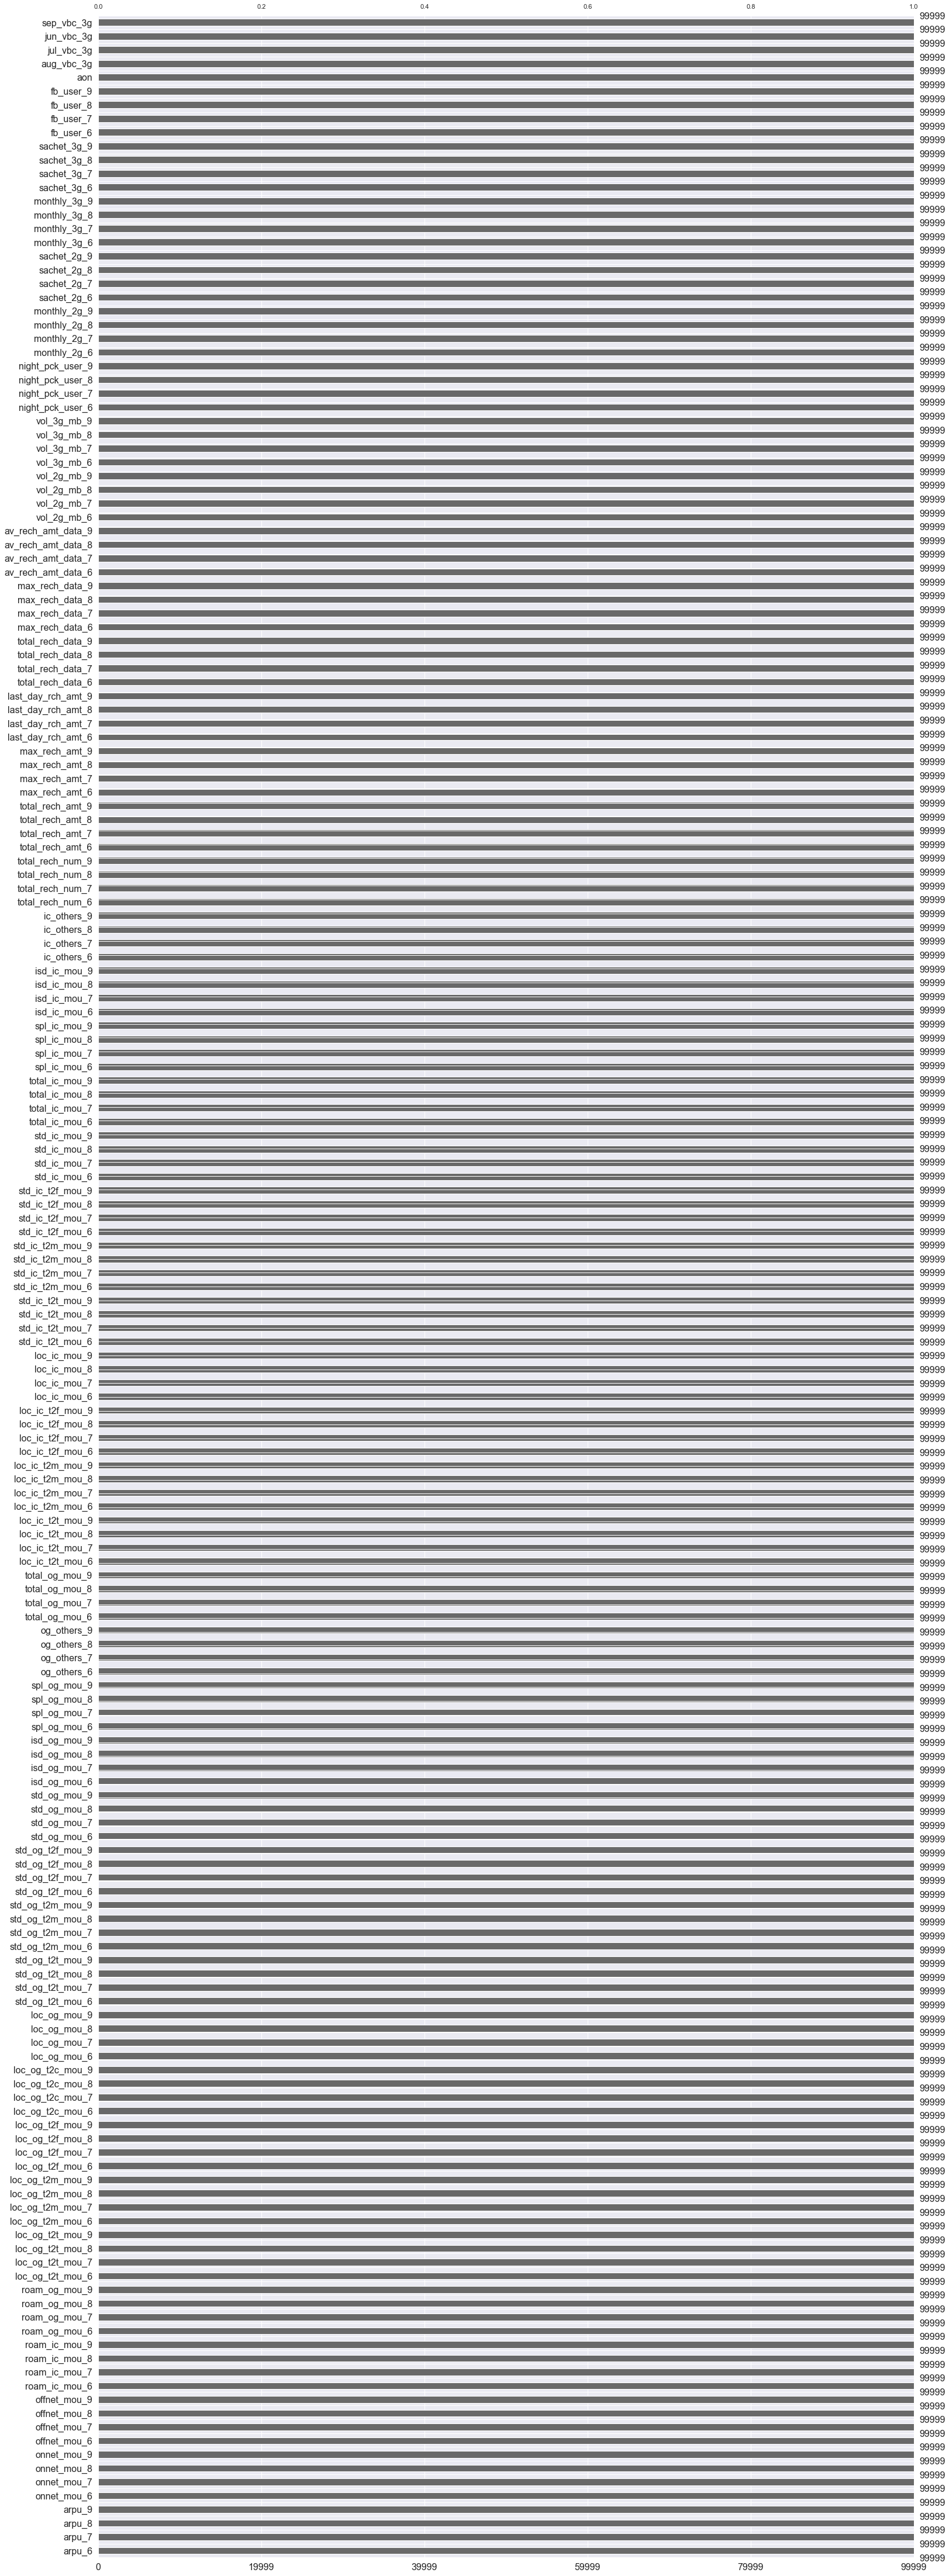

In [134]:
# Visualize missing values as a matrix 
msno.bar(tel) 

### <font color = "red">Derive New Features for GOOD PHASE</font>

In churn prediction, we assume that there are three phases of customer lifecycle :

        The ‘good’ phase [Month 6 & 7]
        The ‘action’ phase [Month 8]
        The ‘churn’ phase [Month 9]

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

**1.** Derived a new feature as **tot_data_recharge_amt_*** using **total_rech_data_*** and **av_rech_amt_data_*** to capture amount utilized by customer for data.

In [135]:
# Total data recharge amount= total data recharge X average amount of Data recharge
tel["tot_data_recharge_amt_6"] = tel.total_rech_data_6 * tel.av_rech_amt_data_6
tel["tot_data_recharge_amt_7"] = tel.total_rech_data_7 * tel.av_rech_amt_data_7

**2.** Derived a new feature as **tot_avg_recharge_amt_6_7** for good phase for `June(6th)` and `July(7th)`.

In [136]:
#Average Recharge amount
tel['tot_avg_recharge_amt_6_7'] = ((tel['total_rech_amt_6'] + tel["tot_data_recharge_amt_6"]) +
                                       (tel['total_rech_amt_7'] + tel["tot_data_recharge_amt_7"])) / 2

In [137]:
tel['tot_avg_recharge_amt_6_7'].mean()

485.3280675806758

### <font color = "red">Filter high-value customers</font>

- We need to predict churn only for the high-value customers. 
- High-value customers are those who have recharged with an amount more than or equal to X, where X is the **70th percentile of the average recharge amount** in the **first two months (the good phase)**.
- After filtering the high-value customers, we should get about 29.9k rows.

In [138]:
# 70th percentile of "tot_avg_reharge_amt_6_7"
tel['tot_avg_recharge_amt_6_7'].quantile(.70)

478.0

In [139]:
#Data based on 70th percentile .
tel_high_val_cust = tel[tel["tot_avg_recharge_amt_6_7"] >= tel["tot_avg_recharge_amt_6_7"].quantile(.70)]

In [140]:
tel_high_val_cust.shape

(30001, 188)

In [141]:
#Before dropping shape of dataframe
print("dataframe - Before drop: ", tel_high_val_cust.shape)

#Dropping columns which are not required now.
tel_high_val_cust.drop(columns=["tot_data_recharge_amt_6","tot_data_recharge_amt_7","tot_avg_recharge_amt_6_7"],inplace=True)


#After dropping shape of dataframe
print("dataframe - After drop: ", tel_high_val_cust.shape)

dataframe - Before drop:  (30001, 188)
dataframe - After drop:  (30001, 185)


### <font color = "red">Identify churner and tag, and also remove unnecessary variables</font>


- As defined (churn=1, else 0) based on the fourth month i.e. `September` (9th Month) 

- We can  tag as churn for those (`never get incoming or outgoing` , `never used 2G or 3G internet`) 
- Based on these below variables we need to decide churners
    - total_ic_mou_9
    - total_og_mou_9
    - vol_2g_mb_9
    - vol_3g_mb_9

In [142]:
#Derived new variable based on the total number of incoming and outgoing call in mins by adding both.
tel_high_val_cust['total_in_out_calls_9'] = tel_high_val_cust.total_ic_mou_9 + tel_high_val_cust.total_og_mou_9

In [143]:
tel_high_val_cust[tel_high_val_cust['total_in_out_calls_9'] == 0]['total_in_out_calls_9'].value_counts()

0.00    2847
Name: total_in_out_calls_9, dtype: int64

In [144]:
#Derived new variable based on the total users of mobile internet usage as 2G and 3G by adding both.
tel_high_val_cust["total_internet_data_usage"] = tel_high_val_cust.vol_2g_mb_9 + tel_high_val_cust.vol_3g_mb_9

In [145]:
tel_high_val_cust[tel_high_val_cust['total_internet_data_usage'] == 0]['total_internet_data_usage'].value_counts()

0.00    16096
Name: total_internet_data_usage, dtype: int64

### <font color="red">Derived CHURN variable</font>
- Customer who have not made any incoming and outgoing calls **AND** Customer have not consumed any 2G and 3G mobile internet data in the month of Septemmber (9th Month) will be tagged as Churn customer.
- Churn = 1
- Non-Churn = 0

In [146]:
#Create churn variable based on above observation
tel_high_val_cust["churn"] = tel_high_val_cust.apply(lambda x : 1 
                                                             if (x.total_in_out_calls_9 == 0 and 
                                                                 x.total_internet_data_usage == 0) 
                                                             else 0, 
                                                             axis=1)

In [147]:
# churn percentage
tel_high_val_cust["churn"].value_counts(normalize=True)*100

0                  91.86
1                   8.14
Name: churn, dtype: float64

In [148]:
#Before dropping shape of dataframe
print("dataframe - Before drop: ", tel_high_val_cust.shape)

#We can now drop the variable.
tel_high_val_cust.drop(columns=["total_in_out_calls_9","total_internet_data_usage"], inplace=True)

#After dropping shape of dataframe
print("dataframe - After drop: ", tel_high_val_cust.shape)

dataframe - Before drop:  (30001, 188)
dataframe - After drop:  (30001, 186)


### <font color="red">Dropping variables related to `September (9th)` month: `Churn analysis Month` </font>

- As we are going to do analysis for september, so this is good to remove (all variables having ‘_9’, etc. in their names.
- These columns contain data where these users are already churned. Hence those will not contribute anything to churn prediction.

In [149]:
#Before dropping shape of dataframe
print("dataframe - Before drop: ", tel_high_val_cust.shape)

# drop all 9th month columns
tel_high_val_cust = tel_high_val_cust.filter(regex='[^9]$', axis=1)

#After dropping shape of dataframe
print("dataframe - After drop: ", tel_high_val_cust.shape)

dataframe - Before drop:  (30001, 186)
dataframe - After drop:  (30001, 141)


In [150]:
# These variables, lets rename to align with others
tel_high_val_cust.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 
                        'jul_vbc_3g': 'vbc_3g_7', 
                        'aug_vbc_3g': 'vbc_3g_8', 
                        'sep_vbc_3g': 'vbc_3g_9'},
                        inplace=True)

In [151]:
#Before dropping shape of dataframe
print("dataframe - Before drop: ", tel_high_val_cust.shape)

# drop all 9th month columns
tel_high_val_cust = tel_high_val_cust.filter(regex='[^9]$', axis=1)

#After dropping shape of dataframe
print("dataframe - After drop: ", tel_high_val_cust.shape)

dataframe - Before drop:  (30001, 141)
dataframe - After drop:  (30001, 140)


### <font color="red"> Health check of data before `EDA` </font>

In [152]:
tel_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 140 entries, arpu_6 to churn
dtypes: category(6), float64(108), int64(26)
memory usage: 31.1 MB


In [153]:
#Check null values
pd.DataFrame((round(tel_high_val_cust.isnull().sum()/len(tel_high_val_cust.index)*100,2).sort_values(ascending=False)),columns=["Null %"])[tel_high_val_cust.isnull().sum() > 0]

Empty DataFrame
Columns: [Null %]
Index: []

In [154]:
tel_high_val_cust.describe()

arpu_6               arpu_7               arpu_8  \
count            30,001.00            30,001.00            30,001.00   
mean                558.49               560.78               508.60   
std                 460.64               479.78               501.96   
min              -2,258.71            -2,014.05              -945.81   
25%                 309.87               309.83               231.47   
50%                 481.69               480.94               427.58   
75%                 699.94               698.32               661.49   
max              27,731.09            35,145.83            33,543.62   

               onnet_mou_6          onnet_mou_7          onnet_mou_8  \
count            30,001.00            30,001.00            30,001.00   
mean                260.79               267.82               234.11   
std                 459.64               479.99               458.45   
min                   0.00                 0.00                 0.00   
25%                  17.08                16.03                10.39   
50%                  84.58                82.81                65.61   
75%                 290.44               290.24               239.96   
max               7,376.71             8,157.78            10,752.56   

              offnet_mou_6         offnet_mou_7         offnet_mou_8  \
count            30,001.00            30,001.00            30,001.00   
mean                373.69               378.10               335.08   
std                 482.52               498.92               482.06   
min                   0.00                 0.00                 0.00   
25%                  71.61                69.91                46.74   
50%                 222.54               220.03               182.79   
75%                 487.94               494.01               438.89   
max               8,362.36             9,667.13            14,007.34   

             roam_ic_mou_6        roam_ic_mou_7        roam_ic_mou_8  \
count            30,001.00            30,001.00            30,001.00   
mean                 16.11                12.64                12.50   
std                  76.30                75.79                74.13   
min                   0.00                 0.00                 0.00   
25%                   0.00                 0.00                 0.00   
50%                   0.00                 0.00                 0.00   
75%                   0.00                 0.00                 0.00   
max               2,613.31             3,813.29             4,169.81   

             roam_og_mou_6        roam_og_mou_7        roam_og_mou_8  \
count            30,001.00            30,001.00            30,001.00   
mean                 26.57                20.15                19.87   
std                 116.21                96.10               104.72   
min                   0.00                 0.00                 0.00   
25%                   0.00                 0.00                 0.00   
50%                   0.00                 0.00                 0.00   
75%                   0.00                 0.00                 0.00   
max               3,775.11             2,812.04             5,337.04   

          loc_og_t2t_mou_6     loc_og_t2t_mou_7     loc_og_t2t_mou_8  \
count            30,001.00            30,001.00            30,001.00   
mean                 84.48                85.67                78.08   
std                 228.79               240.53               227.37   
min                   0.00                 0.00                 0.00   
25%                   4.38                 4.61                 2.53   
50%                  24.33                24.68                20.73   
75%                  77.98                78.34                72.04   
max               6,431.33             7,400.66            10,752.56   

          loc_og_t2m_mou_6     loc_og_t2m_mou_7     loc_og_t2m_mou_8  \
count            30,001.00            30,001.00       

In [155]:
tel_high_val_cust.shape

(30001, 140)

### <font color="red"> 3. EDA </font>
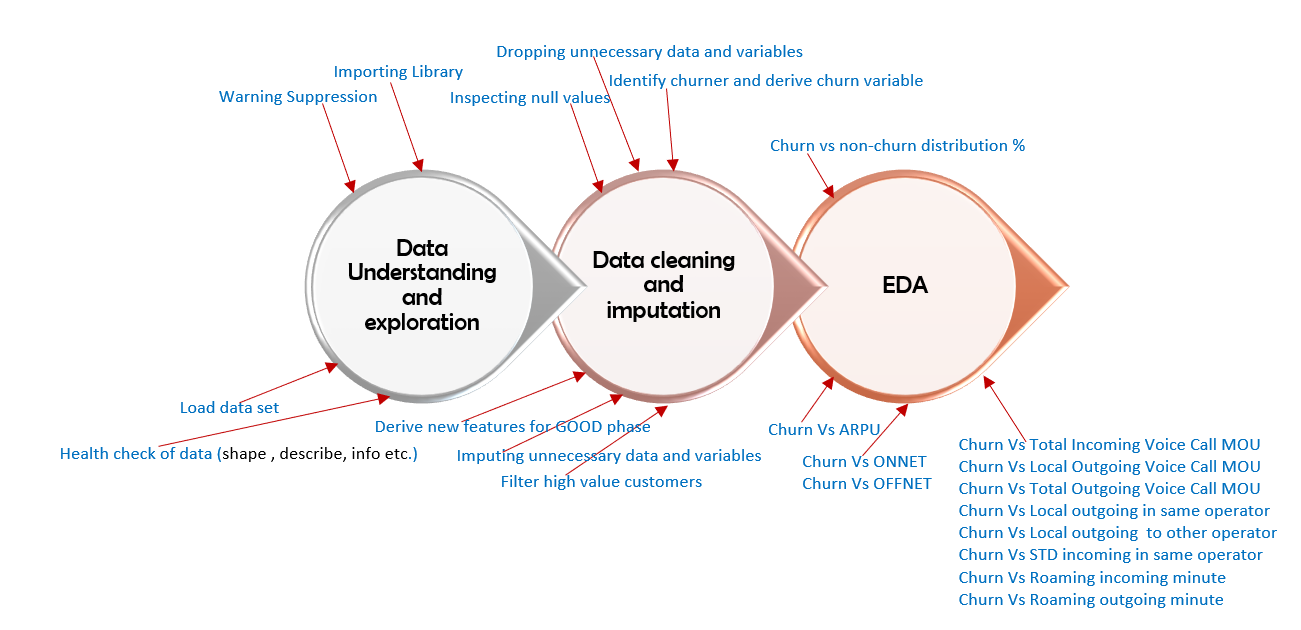
 

In [156]:
def bar_graph_plot_function(data, graph_title, x_axis_label, y_axis_label, data_label='horizontal', x_label_rotation=0, x_text=None):
    plt.figure(figsize=(15,5))
    population_graph = sns.barplot(x=data.index, y=data.values)
    label_deviation_above_y_axis = data.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        population_graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label)       
    if x_text is None:
        population_graph.set_xticklabels(population_graph.get_xticklabels(), rotation=x_label_rotation)
    else:
        population_graph.set_xticklabels(x_text, rotation=x_label_rotation)
    plt.title(graph_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.show()

In [157]:
churn=tel_high_val_cust["churn"].value_counts(normalize=True)*100

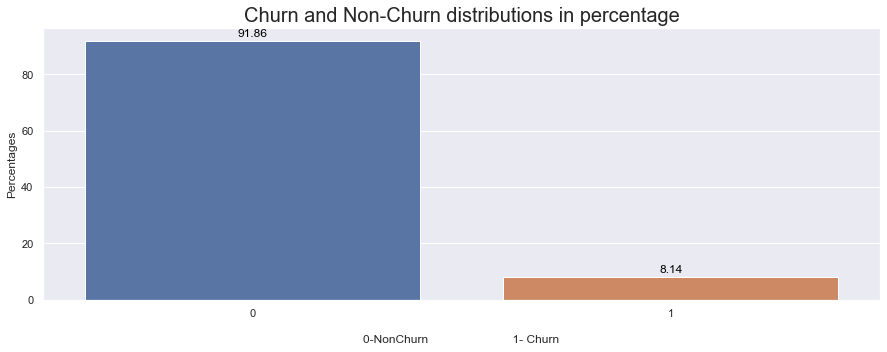

In [158]:
bar_graph_plot_function(churn, "Churn and Non-Churn distributions in percentage", "\n0-NonChurn                         1- Churn","Percentages", data_label='horizontal', x_label_rotation=0, x_text=None)

In [159]:
#compare average revenue and calculate the difference
tel_high_val_cust['arpu_diff'] = tel_high_val_cust.arpu_8 - ((tel_high_val_cust.arpu_6 + tel_high_val_cust.arpu_7)/2)

#  Net usage of variuos variable related to Minutes of Usage and calculate difference
tel_high_val_cust['onnet_mou_diff'] = tel_high_val_cust.onnet_mou_8 - ((tel_high_val_cust.onnet_mou_6 + tel_high_val_cust.onnet_mou_7)/2)
tel_high_val_cust['offnet_mou_diff'] = tel_high_val_cust.offnet_mou_8 - ((tel_high_val_cust.offnet_mou_6 + tel_high_val_cust.offnet_mou_7)/2)
tel_high_val_cust['roam_ic_mou_diff'] = tel_high_val_cust.roam_ic_mou_8 - ((tel_high_val_cust.roam_ic_mou_6 + tel_high_val_cust.roam_ic_mou_7)/2)
tel_high_val_cust['roam_og_mou_diff'] = tel_high_val_cust.roam_og_mou_8 - ((tel_high_val_cust.roam_og_mou_6 + tel_high_val_cust.roam_og_mou_7)/2)
tel_high_val_cust['loc_og_mou_diff'] = tel_high_val_cust.loc_og_mou_8 - ((tel_high_val_cust.loc_og_mou_6 + tel_high_val_cust.loc_og_mou_7)/2)
tel_high_val_cust['std_og_mou_diff'] = tel_high_val_cust.std_og_mou_8 - ((tel_high_val_cust.std_og_mou_6 + tel_high_val_cust.std_og_mou_7)/2)
tel_high_val_cust['isd_og_mou_diff'] = tel_high_val_cust.isd_og_mou_8 - ((tel_high_val_cust.isd_og_mou_6 + tel_high_val_cust.isd_og_mou_7)/2)
tel_high_val_cust['spl_og_mou_diff'] = tel_high_val_cust.spl_og_mou_8 - ((tel_high_val_cust.spl_og_mou_6 + tel_high_val_cust.spl_og_mou_7)/2)
tel_high_val_cust['total_og_mou_diff'] = tel_high_val_cust.total_og_mou_8 - ((tel_high_val_cust.total_og_mou_6 + tel_high_val_cust.total_og_mou_7)/2)
tel_high_val_cust['loc_ic_mou_diff'] = tel_high_val_cust.loc_ic_mou_8 - ((tel_high_val_cust.loc_ic_mou_6 + tel_high_val_cust.loc_ic_mou_7)/2)
tel_high_val_cust['std_ic_mou_diff'] = tel_high_val_cust.std_ic_mou_8 - ((tel_high_val_cust.std_ic_mou_6 + tel_high_val_cust.std_ic_mou_7)/2)
tel_high_val_cust['isd_ic_mou_diff'] = tel_high_val_cust.isd_ic_mou_8 - ((tel_high_val_cust.isd_ic_mou_6 + tel_high_val_cust.isd_ic_mou_7)/2)
tel_high_val_cust['spl_ic_mou_diff'] = tel_high_val_cust.spl_ic_mou_8 - ((tel_high_val_cust.spl_ic_mou_6 + tel_high_val_cust.spl_ic_mou_7)/2)
tel_high_val_cust['total_ic_mou_diff'] = tel_high_val_cust.total_ic_mou_8 - ((tel_high_val_cust.total_ic_mou_6 + tel_high_val_cust.total_ic_mou_7)/2)

# Net Recharge volume
tel_high_val_cust['total_rech_num_diff'] = tel_high_val_cust.total_rech_num_8 - ((tel_high_val_cust.total_rech_num_6 + tel_high_val_cust.total_rech_num_7)/2)
# Net recharge amount
tel_high_val_cust['total_rech_amt_diff'] = tel_high_val_cust.total_rech_amt_8 - ((tel_high_val_cust.total_rech_amt_6 + tel_high_val_cust.total_rech_amt_7)/2)
# Net  maximum recharge amount
tel_high_val_cust['max_rech_amt_diff'] = tel_high_val_cust.max_rech_amt_8 - ((tel_high_val_cust.max_rech_amt_6 + tel_high_val_cust.max_rech_amt_7)/2)
# Net total recharge data
tel_high_val_cust['total_rech_data_diff'] = tel_high_val_cust.total_rech_data_8 - ((tel_high_val_cust.total_rech_data_6 + tel_high_val_cust.total_rech_data_7)/2)
# Net  maximum recharge data
tel_high_val_cust['max_rech_data_diff'] = tel_high_val_cust.max_rech_data_8 - ((tel_high_val_cust.max_rech_data_6 + tel_high_val_cust.max_rech_data_7)/2)
# Net average recharge amount in Data
tel_high_val_cust['av_rech_amt_data_diff'] = tel_high_val_cust.av_rech_amt_data_8 - ((tel_high_val_cust.av_rech_amt_data_6 + tel_high_val_cust.av_rech_amt_data_7)/2)
# Net 2G data consumption difference in MB
tel_high_val_cust['vol_2g_mb_diff'] = tel_high_val_cust.vol_2g_mb_8 - ((tel_high_val_cust.vol_2g_mb_6 + tel_high_val_cust.vol_2g_mb_7)/2)
# Net  3G data consumption in MB
tel_high_val_cust['vol_3g_mb_diff'] = tel_high_val_cust.vol_3g_mb_8 - ((tel_high_val_cust.vol_3g_mb_6 + tel_high_val_cust.vol_3g_mb_7)/2)

In [160]:
# Function for bar plot that will be re-used and save some code
def bar_plot_func(var, plot_title, y_label, stat_tech="Median", x_rot=0):
    if (stat_tech == "Median"):
        tel_high_val_cust.groupby("churn")[var].median().plot.bar(figsize=[8,6],color='gbr')
    else:
        tel_high_val_cust.groupby("churn")[var].mean().plot.bar(figsize=[8,6],color='rbg')
    plt.title(plot_title, fontsize=12)
    plt.xlabel("0-NonChurn                                1-Churn", fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.xticks(rotation=x_rot)
    plt.show()

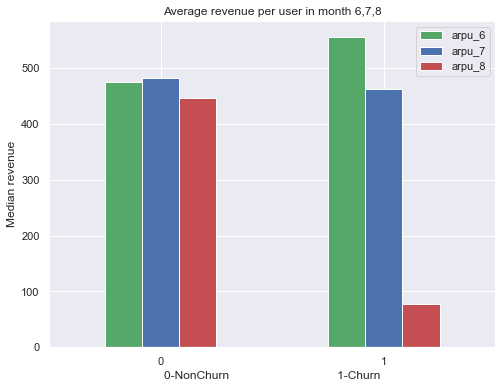

In [161]:
## Churn Vs ARPU - Average revenue per user

bar_plot_func(["arpu_6","arpu_7","arpu_8"], "Average revenue per user in month 6,7,8", "Median revenue")


**Finding** - Average revenue for Churn user is highest in 6th Month, and most likely they will churn if not happy


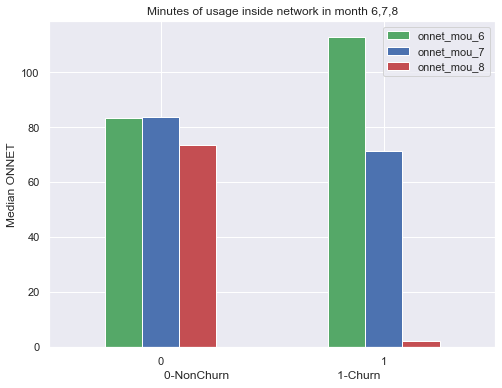

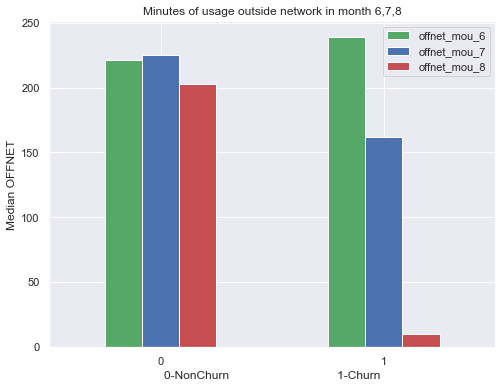

In [162]:
## Churn Vs ONNET - All kind of calls within the same operator network
bar_plot_func(["onnet_mou_6","onnet_mou_7","onnet_mou_8"], "Minutes of usage inside network in month 6,7,8", "Median ONNET")

##Churn Vs OFFNET - All kind of calls outside the operator T network
bar_plot_func(["offnet_mou_6","offnet_mou_7","offnet_mou_8"], "Minutes of usage outside network in month 6,7,8", "Median OFFNET")

**Finding** -  
1. Users whose minutes of usage are more in month 6, they are more likely to churn.
2. Users who have big difference of minutes of call duration to other network between month 6 and month 7 are likely to churn.

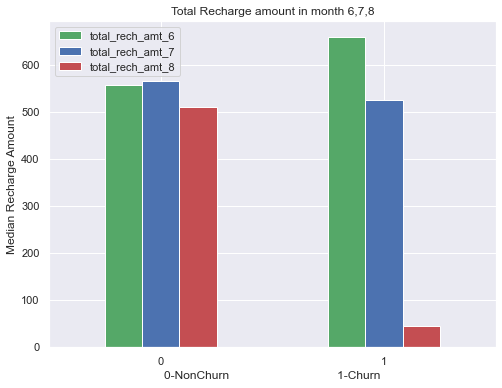

In [163]:
#Churn Vs Total Recharge Amount
bar_plot_func(["total_rech_amt_6","total_rech_amt_7","total_rech_amt_8"], "Total Recharge amount in month 6,7,8", "Median Recharge Amount")

**Finding** -   Users who have not recharge in month 6, 7, 8 may or may not churn, we do not have much evidence from above data.

In [164]:
#Churn Vs 2G Internet Usage (MB)
bar_plot_func(["vol_2g_mb_6","vol_2g_mb_7","vol_2g_mb_8"], "2G recharge in month 6,7,8", "Median 2G Recharge")

**Finding** -  2g recharge who have not done may or may not churn,There is no enough data for analysis.

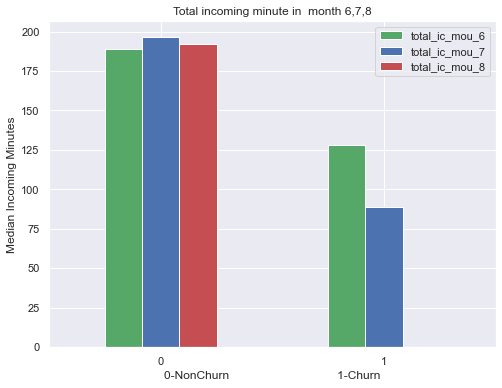

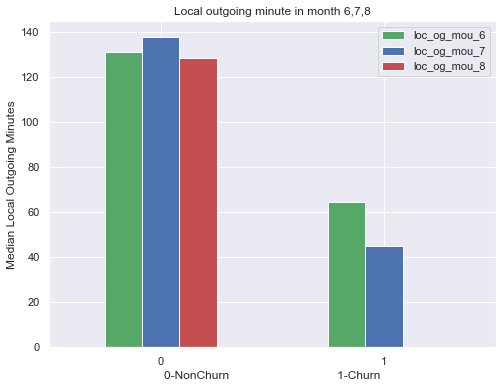

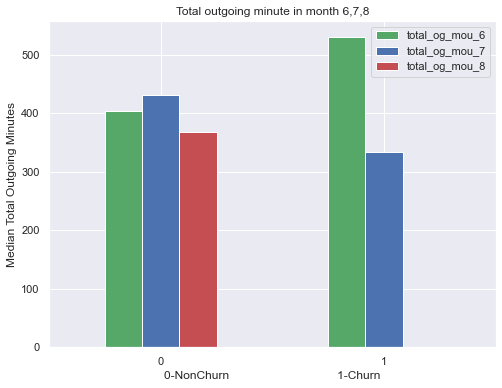

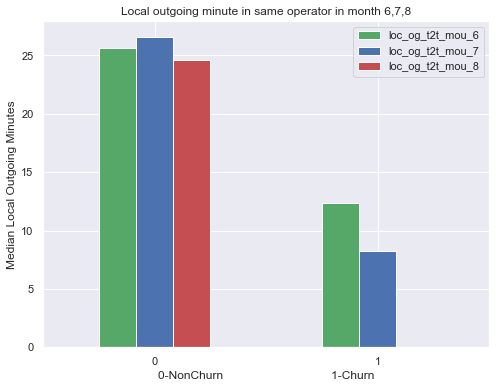

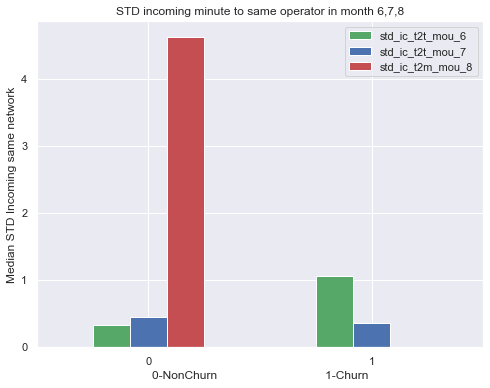

In [165]:
#Churn Vs Total Incoming Voice Call Minutes of Usage
bar_plot_func(["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8"], "Total incoming minute in  month 6,7,8", "Median Incoming Minutes")

#Churn Vs Local Outgoing Voice Call Minutes of Usage
bar_plot_func(["loc_og_mou_6","loc_og_mou_7","loc_og_mou_8"], "Local outgoing minute in month 6,7,8", "Median Local Outgoing Minutes")

#Churn Vs Total Outgoing Voice Call Minutes of Usage
bar_plot_func(["total_og_mou_6","total_og_mou_7","total_og_mou_8"], "Total outgoing minute in month 6,7,8", "Median Total Outgoing Minutes")

#Churn Vs Local outgoing minute in same operator
bar_plot_func(["loc_og_t2t_mou_6","loc_og_t2t_mou_7","loc_og_t2t_mou_8"], "Local outgoing minute in same operator in month 6,7,8", "Median Local Outgoing Minutes")

#Churn Vs Local outgoing minute to other operator
bar_plot_func(["loc_og_t2m_mou_6","loc_og_t2m_mou_7","loc_og_t2m_mou_8"], "Local outgoing minute to other operator in month 6,7,8", "Median Local Outgoing other network")

#Churn Vs STD incoming minute in same operator
bar_plot_func(["std_ic_t2t_mou_6","std_ic_t2t_mou_7","std_ic_t2m_mou_8"], "STD incoming minute to same operator in month 6,7,8", "Median STD Incoming same network")

#Churn Vs Roaming incoming minute
bar_plot_func(["roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8"], "Roming incoming minutes in month 6,7,8", "Mean roaming incoming minutes", "Mean")

#Churn Vs Roaming outgoing minute
bar_plot_func(["roam_og_mou_6","roam_og_mou_7","roam_og_mou_8"], "Roming outgoing minutes in month 6,7,8", "Mean roaming outgoing minutes", "Mean")

**Finding** - 
1. Users who have more difference in Total incoming minutes in month 6,7,8 are more likely to churn.
2. Local outgoing minute are less so users are more likely to churn
3. Total outgoing minute usage difference is more between month 6 and 7, users are more likely to Churn.
4. Local outgoing minute in same operator in month 6,7,8 are less, users are more likely to churn.
5. Local outgoing minute to other operator is less, more likely to churn.
6. Users who are using more STD calls are more likely to churn.
7. Roaming in incoming minutes more, they are likely to churn more.
8. Roaming in outgoing minutes more, Users are more likely to churn.

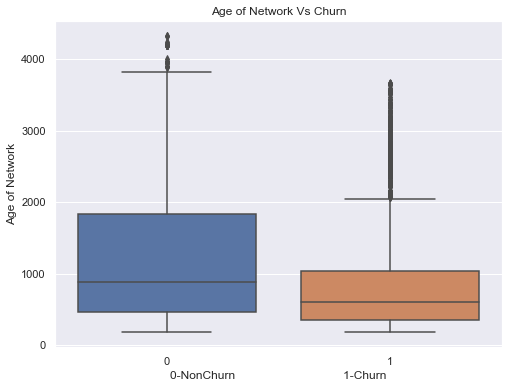

In [166]:
#Churn Vs Age of Network
plt.figure(figsize=[8,6])
sns.boxplot(data=tel_high_val_cust, x="churn", y="aon")
plt.title("Age of Network Vs Churn", fontsize=12)
plt.xlabel("0-NonChurn                                1-Churn",fontsize=12)
plt.ylabel("Age of Network",fontsize=12)
plt.show()

**Finding** - Median Age of network less, more likely to churn.

In [167]:

#Check the shape of dataframes
print("No. of Rows and Columns in telecom high value customer DataFrame:", tel_high_val_cust.shape)

No. of Rows and Columns in telecom high value customer DataFrame: (30001, 163)


In [168]:
# Percentages of churn in each category of Night Pack Users in month 8
pd.crosstab(tel_high_val_cust.churn, tel_high_val_cust.night_pck_user_8, normalize='columns')



night_pck_user_8                 -1.0                  0.0  \
churn                                                        
0                                0.86                 0.97   
1                                0.14                 0.03   

night_pck_user_8                  1.0  
churn                                  
0                                0.97  
1                                0.03

In [169]:
#Percenatges of churn in each category of Facebook Users in month 8
pd.crosstab(tel_high_val_cust.churn, tel_high_val_cust.fb_user_8, normalize='columns')

fb_user_8                 -1.0                  0.0                  1.0
churn                                                                   
0                         0.86                 0.93                 0.98
1                         0.14                 0.07                 0.02

**Finding based on above data**
- Night pack users (8th Month) have high churn rate which is close to 14%
- Facebook users  (8th Month) have churn rate close to 2%
- Non- Facebook users  (8th Month), close to 7% churns.

In [170]:
new_cat_var = tel_high_val_cust.select_dtypes(include=['category']).columns.tolist()

In [171]:
new_cat_var

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

## <font color = "red">4. Data Preparation for Model</font>


In [1]:
## Split the data into train and test set , using 0.7 and 0,3

In [173]:
## Using random function we will sample the data
np.random.seed(0)
tel_train, tel_test = train_test_split(tel_high_val_cust, test_size=0.3,random_state=100)

In [174]:
#Let's check shape of train and test set
print("tel_train shape: ", tel_train.shape)
print("tel_test shape: ", tel_test.shape)

tel_train shape:  (21000, 163)
tel_test shape:  (9001, 163)


In [175]:
#Calculate categorical features mean and replace those with categorical value
print(tel_train.groupby('night_pck_user_6')["churn"].mean())
print(tel_train.groupby('night_pck_user_7')["churn"].mean())
print(tel_train.groupby('night_pck_user_8')["churn"].mean())
print(tel_train.groupby('fb_user_6')["churn"].mean())
print(tel_train.groupby('fb_user_7')["churn"].mean())
print(tel_train.groupby('fb_user_8')["churn"].mean())

night_pck_user_6
-1.0                   0.10
0.0                    0.07
1.0                    0.09
Name: churn, dtype: float64
night_pck_user_7
-1.0                   0.11
0.0                    0.06
1.0                    0.06
Name: churn, dtype: float64
night_pck_user_8
-1.0                   0.14
0.0                    0.03
1.0                    0.03
Name: churn, dtype: float64
fb_user_6
-1.0                   0.10
0.0                    0.08
1.0                    0.07
Name: churn, dtype: float64
fb_user_7
-1.0                   0.11
0.0                    0.06
1.0                    0.06
Name: churn, dtype: float64
fb_user_8
-1.0                   0.14
0.0                    0.06
1.0                    0.02
Name: churn, dtype: float64


In [176]:
#Map each categorical value with its respective mean value
internet_data_map = {'night_pck_user_6' : {-1: 0.10, 0: 0.07, 1: 0.09},
           'night_pck_user_7' : {-1: 0.11, 0: 0.06, 1: 0.06},
           'night_pck_user_8' : {-1: 0.14, 0: 0.03, 1: 0.03},
           'fb_user_6'        : {-1: 0.10, 0: 0.08, 1: 0.07},
           'fb_user_7'        : {-1: 0.11, 0: 0.06, 1: 0.06},
           'fb_user_8'        : {-1: 0.14, 0: 0.06, 1: 0.02}}

#convert categorical to Numeric features by aggregation and replace in train data
tel_train.replace(internet_data_map, inplace = True)
#replace the same in test data
tel_test.replace(internet_data_map, inplace = True)

In [177]:
tel_train.head()

arpu_6               arpu_7               arpu_8  \
39186             1,086.34               910.30               592.62   
39833               513.36               311.60               364.13   
38778               298.31               314.18               313.41   
43026             1,235.16               323.67               705.44   
12271               437.89               457.52               264.20   

               onnet_mou_6          onnet_mou_7          onnet_mou_8  \
39186                 5.69                 8.28                 4.84   
39833               144.89                49.84                40.71   
38778                69.33                77.09                83.28   
43026             2,383.19               165.84               697.44   
12271                17.63                45.96                23.89   

              offnet_mou_6         offnet_mou_7         offnet_mou_8  \
39186               151.89               159.01                98.06   
39833               321.14               227.63               265.41   
38778               333.28               298.38               213.34   
43026               469.96               200.93               555.04   
12271               186.83               302.06                81.66   

             roam_ic_mou_6        roam_ic_mou_7        roam_ic_mou_8  \
39186                28.96                26.66                31.11   
39833                 0.00                 0.00                 0.00   
38778                17.73                42.28                68.41   
43026                 0.00                39.76                22.81   
12271                 0.00                 0.00                 0.00   

             roam_og_mou_6        roam_og_mou_7        roam_og_mou_8  \
39186                 6.13                14.38                 9.86   
39833                 0.00                 0.00                 0.00   
38778                22.99                21.33                76.69   
43026                 0.00                33.51                23.56   
12271                 0.00                 0.00                 0.00   

          loc_og_t2t_mou_6     loc_og_t2t_mou_7     loc_og_t2t_mou_8  \
39186                 5.39                 7.39                 4.84   
39833                64.46                30.58                40.71   
38778                21.54                11.61                26.54   
43026                41.33                32.68               633.89   
12271                13.88                28.73                12.01   

          loc_og_t2m_mou_6     loc_og_t2m_mou_7     loc_og_t2m_mou_8  \
39186                21.63                30.58                19.81   
39833               277.44               179.54               211.56   
38778               210.16               218.54               127.33   
43026               271.21               145.33               358.19   
12271               182.48               274.86                78.08   

          loc_og_t2f_mou_6     loc_og_t2f_mou_7     loc_og_t2f_mou_8  \
39186                 1.19                 0.00                 0.00   
39833                12.14                 5.18                34.54   
38778                 3.13                 6.98                 0.00   
43026                 1.45                22.09                18.96   
12271                 3.91                25.13                 3.58   

          loc_og_t2c_mou_6     loc_og_t2c_mou_7     loc_og_t2c_mou_8  \
39186                 0.00                 6.40                 1.10   
39833                 0.00                16.51                 0.00   
38778                 0.00                 0.00                 0.00   
43026                 0.00                 0.00                 2.38   
12271                 0.00                 0.00                 0.00   

              loc_og_mou_6         loc_og_mou_7         loc_og_mou_8  \
39186                28.23                37.98    

#### <font color="red">Dividing into X and Y sets for the model building</font>

In [178]:
#Get X and y for Train data
y_train = tel_train.pop('churn')
X_train = tel_train

#Get X and y for Test Data
y_test = tel_test.pop('churn')
X_test = tel_test

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (21000, 162)
X_test shape:  (9001, 162)
y_train shape:  (21000,)
y_test shape:  (9001,)


In [179]:
## Review training data X_train & y_train to check imbalanced
X_train.head()



arpu_6               arpu_7               arpu_8  \
39186             1,086.34               910.30               592.62   
39833               513.36               311.60               364.13   
38778               298.31               314.18               313.41   
43026             1,235.16               323.67               705.44   
12271               437.89               457.52               264.20   

               onnet_mou_6          onnet_mou_7          onnet_mou_8  \
39186                 5.69                 8.28                 4.84   
39833               144.89                49.84                40.71   
38778                69.33                77.09                83.28   
43026             2,383.19               165.84               697.44   
12271                17.63                45.96                23.89   

              offnet_mou_6         offnet_mou_7         offnet_mou_8  \
39186               151.89               159.01                98.06   
39833               321.14               227.63               265.41   
38778               333.28               298.38               213.34   
43026               469.96               200.93               555.04   
12271               186.83               302.06                81.66   

             roam_ic_mou_6        roam_ic_mou_7        roam_ic_mou_8  \
39186                28.96                26.66                31.11   
39833                 0.00                 0.00                 0.00   
38778                17.73                42.28                68.41   
43026                 0.00                39.76                22.81   
12271                 0.00                 0.00                 0.00   

             roam_og_mou_6        roam_og_mou_7        roam_og_mou_8  \
39186                 6.13                14.38                 9.86   
39833                 0.00                 0.00                 0.00   
38778                22.99                21.33                76.69   
43026                 0.00                33.51                23.56   
12271                 0.00                 0.00                 0.00   

          loc_og_t2t_mou_6     loc_og_t2t_mou_7     loc_og_t2t_mou_8  \
39186                 5.39                 7.39                 4.84   
39833                64.46                30.58                40.71   
38778                21.54                11.61                26.54   
43026                41.33                32.68               633.89   
12271                13.88                28.73                12.01   

          loc_og_t2m_mou_6     loc_og_t2m_mou_7     loc_og_t2m_mou_8  \
39186                21.63                30.58                19.81   
39833               277.44               179.54               211.56   
38778               210.16               218.54               127.33   
43026               271.21               145.33               358.19   
12271               182.48               274.86                78.08   

          loc_og_t2f_mou_6     loc_og_t2f_mou_7     loc_og_t2f_mou_8  \
39186                 1.19                 0.00                 0.00   
39833                12.14                 5.18                34.54   
38778                 3.13                 6.98                 0.00   
43026                 1.45                22.09                18.96   
12271                 3.91                25.13                 3.58   

          loc_og_t2c_mou_6     loc_og_t2c_mou_7     loc_og_t2c_mou_8  \
39186                 0.00                 6.40                 1.10   
39833                 0.00                16.51                 0.00   
38778                 0.00                 0.00                 0.00   
43026                 0.00                 0.00                 2.38   
12271                 0.00                 0.00                 0.00   

              loc_og_mou_6         loc_og_mou_7         loc_og_mou_8  \
39186                28.23                37.98    

In [180]:
y_train.head()


39186    0
39833    0
38778    0
43026    0
12271    0
Name: churn, dtype: int64

In [181]:
y_train.value_counts()

0    19309
1    1691 
Name: churn, dtype: int64

This is showing up as clear `imbalanced data set`, so applying `oversampling` on training data set

### <font color="red"> SMOTE is best technique to handle Class imbalance</font>

In [182]:
# Import SMOTE library to handle imbalance in train dataset
from imblearn.over_sampling import SMOTE


In [183]:
## conda install -c conda-forge imbalanced-learn 

In [184]:
# Import SMOTE library to handle imbalance in train dataset
from imblearn.over_sampling import SMOTE

In [185]:
# Perform oversampling with traing data and pass both X_train and y_train to SMOTE
Smote = SMOTE(random_state=100)
X_train_resample, y_train_resample = Smote.fit_resample(X_train,y_train)

In [186]:
print("X_train shape after oversampling: ", X_train_resample.shape)
print("y_train shape after oversampling: ", y_train_resample.shape)

X_train shape after oversampling:  (38618, 162)
y_train shape after oversampling:  (38618,)


In [187]:
print(f"Value count of Churn and Non-Churn Data:\n{y_train_resample.value_counts()}")

Value count of Churn and Non-Churn Data:
1    19309
0    19309
Name: churn, dtype: int64


Non-Churn and Churn `data are balanced`, `after oversampling techinique` 

#### <font color="red">Rescaling the variables</font>

In [188]:
#Creating MinMaxScaler instance
scaler = MinMaxScaler()

In [189]:
# Data frame before rescaling
X_train_resample.describe()

arpu_6               arpu_7               arpu_8  \
count            38,618.00            38,618.00            38,618.00   
mean                584.31               537.26               374.50   
std                 459.97               461.12               475.27   
min              -2,258.71            -2,014.05              -345.13   
25%                 315.78               277.68                50.80   
50%                 509.33               466.11               280.65   
75%                 744.27               689.41               544.50   
max              27,731.09            35,145.83            33,543.62   

               onnet_mou_6          onnet_mou_7          onnet_mou_8  \
count            38,618.00            38,618.00            38,618.00   
mean                298.59               272.75               174.29   
std                 504.00               489.93               400.01   
min                   0.00                 0.00                 0.00   
25%                  18.14                13.37                 0.86   
50%                  94.11                79.91                28.46   
75%                 340.54               290.70               150.99   
max               7,376.71             8,157.78            10,752.56   

              offnet_mou_6         offnet_mou_7         offnet_mou_8  \
count            38,618.00            38,618.00            38,618.00   
mean                405.71               373.88               238.44   
std                 544.00               534.41               413.31   
min                   0.00                 0.00                 0.00   
25%                  70.07                54.10                 5.09   
50%                 223.29               192.08                83.43   
75%                 515.69               477.58               302.45   
max               8,362.36             9,667.13            14,007.34   

             roam_ic_mou_6        roam_ic_mou_7        roam_ic_mou_8  \
count            38,618.00            38,618.00            38,618.00   
mean                 19.07                18.51                16.92   
std                  86.60                95.38                84.65   
min                   0.00                 0.00                 0.00   
25%                   0.00                 0.00                 0.00   
50%                   0.00                 0.00                 0.00   
75%                   0.83                 2.14                 3.12   
max               2,589.09             3,813.29             2,898.34   

             roam_og_mou_6        roam_og_mou_7        roam_og_mou_8  \
count            38,618.00            38,618.00            38,618.00   
mean                 33.28                30.51                26.87   
std                 137.19               114.29               109.54   
min                   0.00                 0.00                 0.00   
25%                   0.00                 0.00                 0.00   
50%                   0.00                 0.00                 0.00   
75%                   2.05                 6.87                 7.01   
max               3,161.79             2,812.04             5,337.04   

          loc_og_t2t_mou_6     loc_og_t2t_mou_7     loc_og_t2t_mou_8  \
count            38,618.00            38,618.00            38,618.00   
mean                 70.06                65.62                48.71   
std                 199.00               202.49               178.49   
min                   0.00                 0.00                 0.00   
25%                   3.58                 2.44                 0.00   
50%                  19.78                17.13                 5.68   
75%                  62.68                56.87                36.96   
max               6,431.33             7,163.21            10,752.56   

          loc_og_t2m_mou_6     loc_og_t2m_mou_7     loc_og_t2m_mou_8  \
count            38,618.00            38,618.00       

In [190]:
#Fit and Transform Train Data
scaled_X_train = pd.DataFrame((scaler.fit_transform(X_train_resample)),columns=X_train.columns)

#Transform Test Data
scaled_X_test = pd.DataFrame((scaler.transform(X_test)),columns=X_test.columns)

In [191]:
print("X_train shape after scaling: ", scaled_X_train.shape)
print("X_test shape after scaling: ", scaled_X_test.shape)

X_train shape after scaling:  (38618, 162)
X_test shape after scaling:  (9001, 162)


In [192]:
scaled_X_train.head()

arpu_6               arpu_7               arpu_8  \
0                 0.11                 0.08                 0.03   
1                 0.09                 0.06                 0.02   
2                 0.09                 0.06                 0.02   
3                 0.12                 0.06                 0.03   
4                 0.09                 0.07                 0.02   

           onnet_mou_6          onnet_mou_7          onnet_mou_8  \
0                 0.00                 0.00                 0.00   
1                 0.02                 0.01                 0.00   
2                 0.01                 0.01                 0.01   
3                 0.32                 0.02                 0.06   
4                 0.00                 0.01                 0.00   

          offnet_mou_6         offnet_mou_7         offnet_mou_8  \
0                 0.02                 0.02                 0.01   
1                 0.04                 0.02                 0.02   
2                 0.04                 0.03                 0.02   
3                 0.06                 0.02                 0.04   
4                 0.02                 0.03                 0.01   

         roam_ic_mou_6        roam_ic_mou_7        roam_ic_mou_8  \
0                 0.01                 0.01                 0.01   
1                 0.00                 0.00                 0.00   
2                 0.01                 0.01                 0.02   
3                 0.00                 0.01                 0.01   
4                 0.00                 0.00                 0.00   

         roam_og_mou_6        roam_og_mou_7        roam_og_mou_8  \
0                 0.00                 0.01                 0.00   
1                 0.00                 0.00                 0.00   
2                 0.01                 0.01                 0.01   
3                 0.00                 0.01                 0.00   
4                 0.00                 0.00                 0.00   

      loc_og_t2t_mou_6     loc_og_t2t_mou_7     loc_og_t2t_mou_8  \
0                 0.00                 0.00                 0.00   
1                 0.01                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.01                 0.00                 0.06   
4                 0.00                 0.00                 0.00   

      loc_og_t2m_mou_6     loc_og_t2m_mou_7     loc_og_t2m_mou_8  \
0                 0.00                 0.01                 0.00   
1                 0.06                 0.04                 0.04   
2                 0.04                 0.05                 0.03   
3                 0.06                 0.03                 0.07   
4                 0.04                 0.06                 0.02   

      loc_og_t2f_mou_6     loc_og_t2f_mou_7     loc_og_t2f_mou_8  \
0                 0.00                 0.00                 0.00   
1                 0.01                 0.00                 0.06   
2                 0.00                 0.01                 0.00   
3                 0.00                 0.02                 0.03   
4                 0.00                 0.02                 0.01   

      loc_og_t2c_mou_6     loc_og_t2c_mou_7     loc_og_t2c_mou_8  \
0                 0.00                 0.01                 0.00   
1                 0.00                 0.03                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                 0.00                 0.01   
4                 0.00                 0.00                 0.00   

          loc_og_mou_6         loc_og_mou_7         loc_og_mou_8  \
0                 0.00                 0.01                 0.00   
1                 0.03                 0.03                 0.03   
2                 0.02                 0.03                 0.01   
3                 0.03                 0.03                 0.0

In [193]:
# Data frame after rescaling
scaled_X_train.describe()

arpu_6               arpu_7               arpu_8  \
count            38,618.00            38,618.00            38,618.00   
mean                  0.09                 0.07                 0.02   
std                   0.02                 0.01                 0.01   
min                   0.00                 0.00                 0.00   
25%                   0.09                 0.06                 0.01   
50%                   0.09                 0.07                 0.02   
75%                   0.10                 0.07                 0.03   
max                   1.00                 1.00                 1.00   

               onnet_mou_6          onnet_mou_7          onnet_mou_8  \
count            38,618.00            38,618.00            38,618.00   
mean                  0.04                 0.03                 0.02   
std                   0.07                 0.06                 0.04   
min                   0.00                 0.00                 0.00   
25%                   0.00                 0.00                 0.00   
50%                   0.01                 0.01                 0.00   
75%                   0.05                 0.04                 0.01   
max                   1.00                 1.00                 1.00   

              offnet_mou_6         offnet_mou_7         offnet_mou_8  \
count            38,618.00            38,618.00            38,618.00   
mean                  0.05                 0.04                 0.02   
std                   0.07                 0.06                 0.03   
min                   0.00                 0.00                 0.00   
25%                   0.01                 0.01                 0.00   
50%                   0.03                 0.02                 0.01   
75%                   0.06                 0.05                 0.02   
max                   1.00                 1.00                 1.00   

             roam_ic_mou_6        roam_ic_mou_7        roam_ic_mou_8  \
count            38,618.00            38,618.00            38,618.00   
mean                  0.01                 0.00                 0.01   
std                   0.03                 0.03                 0.03   
min                   0.00                 0.00                 0.00   
25%                   0.00                 0.00                 0.00   
50%                   0.00                 0.00                 0.00   
75%                   0.00                 0.00                 0.00   
max                   1.00                 1.00                 1.00   

             roam_og_mou_6        roam_og_mou_7        roam_og_mou_8  \
count            38,618.00            38,618.00            38,618.00   
mean                  0.01                 0.01                 0.01   
std                   0.04                 0.04                 0.02   
min                   0.00                 0.00                 0.00   
25%                   0.00                 0.00                 0.00   
50%                   0.00                 0.00                 0.00   
75%                   0.00                 0.00                 0.00   
max                   1.00                 1.00                 1.00   

          loc_og_t2t_mou_6     loc_og_t2t_mou_7     loc_og_t2t_mou_8  \
count            38,618.00            38,618.00            38,618.00   
mean                  0.01                 0.01                 0.00   
std                   0.03                 0.03                 0.02   
min                   0.00                 0.00                 0.00   
25%                   0.00                 0.00                 0.00   
50%                   0.00                 0.00                 0.00   
75%                   0.01                 0.01                 0.00   
max                   1.00                 1.00                 1.00   

          loc_og_t2m_mou_6     loc_og_t2m_mou_7     loc_og_t2m_mou_8  \
count            38,618.00            38,618.00       

### <font color="red"> PCA on scaled train and test </font>

- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [199]:
scaled_X_train.shape

(38618, 162)

In [200]:
pca = PCA(random_state=42)

In [201]:
pca.fit(scaled_X_train)

PCA(random_state=42)

In [202]:
#Components from the PCA
pca.components_

array([[-3.42903058e-03, -1.81529021e-03,  2.15107449e-04, ...,
        -3.86249362e-03, -2.07042046e-03, -6.00756718e-04],
       [ 9.04847515e-04,  5.08783769e-03,  8.44784756e-03, ...,
         4.11864073e-02,  1.21066649e-02,  1.20883842e-02],
       [ 5.48725776e-03, -2.28628120e-03,  1.72950439e-03, ...,
         1.57743864e-02,  3.45744009e-03,  4.23575757e-03],
       ...,
       [-0.00000000e+00, -1.74204332e-15,  5.97752738e-16, ...,
        -6.75207535e-02, -1.80184130e-03,  4.16432256e-02],
       [ 0.00000000e+00,  2.06621411e-15, -1.85263644e-15, ...,
        -4.15863558e-02, -8.62404622e-03, -3.05208658e-03],
       [ 3.38109171e-01,  4.18945680e-01, -7.64133095e-01, ...,
        -7.94503352e-16, -3.82506526e-16,  7.14706072e-16]])

In [203]:
#Looking at the explained variance ratio for each component
pca.explained_variance_ratio_

array([6.05253142e-01, 1.46502419e-01, 1.01129071e-01, 2.91000405e-02,
       1.72907245e-02, 1.11932936e-02, 9.35048893e-03, 7.80987253e-03,
       6.42382366e-03, 5.95969055e-03, 4.64840441e-03, 3.59527774e-03,
       3.08930929e-03, 2.92966821e-03, 2.52988834e-03, 2.43442887e-03,
       2.10178231e-03, 2.01168712e-03, 1.92304518e-03, 1.88839820e-03,
       1.64007398e-03, 1.61891178e-03, 1.53943127e-03, 1.43339667e-03,
       1.31478084e-03, 1.25180275e-03, 1.16506239e-03, 1.11316816e-03,
       1.04363739e-03, 1.01715808e-03, 9.99389197e-04, 9.18853886e-04,
       8.83143389e-04, 8.50428245e-04, 7.93356319e-04, 7.51415772e-04,
       7.04146115e-04, 6.72941647e-04, 6.44280618e-04, 6.28445150e-04,
       5.71267657e-04, 5.24659832e-04, 4.76260391e-04, 4.59863025e-04,
       4.33327302e-04, 4.20604236e-04, 3.86979221e-04, 3.54803596e-04,
       3.42963600e-04, 3.31999179e-04, 3.21539038e-04, 3.09641172e-04,
       2.96232267e-04, 2.94124003e-04, 2.80745026e-04, 2.73483427e-04,
      

In [204]:
var_cumsum = np.cumsum(pca.explained_variance_ratio_)

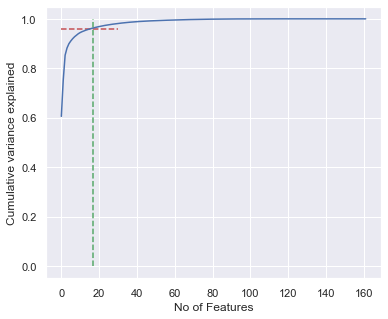

In [207]:
fig = plt.figure(figsize=[6,5])
plt.vlines(x=17, ymax=1, ymin=0, colors="g", linestyles="--")
plt.hlines(y=0.96, xmax=30, xmin=0, colors="r", linestyles="--")
plt.plot(var_cumsum)
plt.ylabel("Cumulative variance explained")
plt.xlabel("No of Features")
plt.show()

We identified PCA to performed on `17 compoenents`

#### Making it a little more unsupervised 
So far we use scree-plot to choose the number of components that explain a certain amount of variance before going for the dimensionality reduction using PCA. 
Lets explore other functionality, all we need to do is to select the amount of variance that we want our final dataset to capture and PCA does the rest for us.

In [208]:
# Lets pass variance value to get required principal components
pca_final = PCA(0.96,random_state=42)

tel_train_pca_final = pca_final.fit_transform(scaled_X_train)
print(f"Final PCA Train data shape:{tel_train_pca_final.shape}")

tel_test_pca_final = pca_final.transform(scaled_X_test)
print(f"Final PCA Test data shape:{tel_test_pca_final.shape}")

Final PCA Train data shape:(38618, 17)
Final PCA Test data shape:(9001, 17)


<AxesSubplot:>

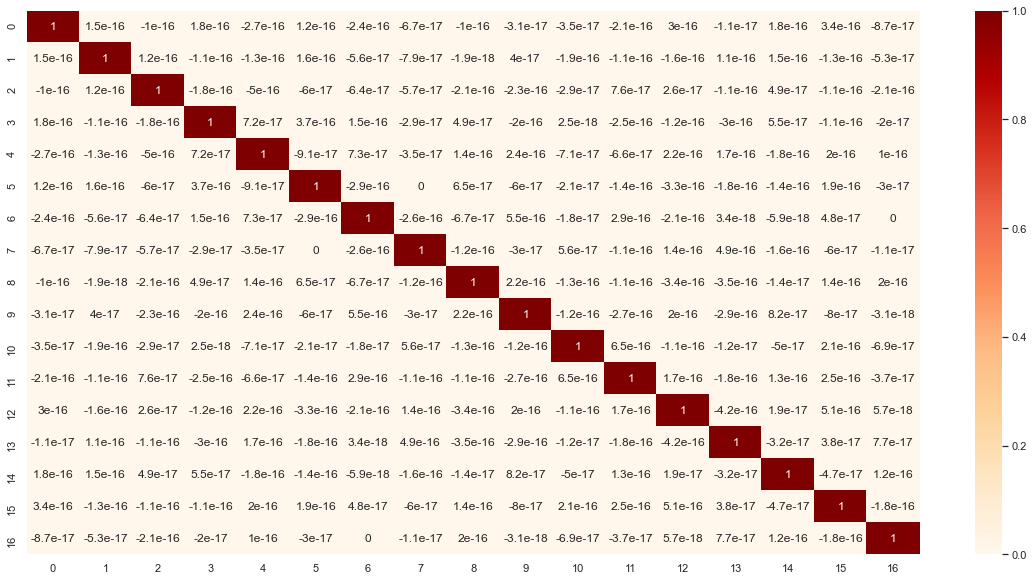

In [210]:
#Lets plot it and see correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(np.corrcoef(tel_train_pca_final.transpose()),cmap="OrRd", annot=True)

Based on above now we get `suitable no of principal components as 17`. We will use the same for further prediction on different models.

## <font color="red">5. Model Building:</font>

- We choose below model for verification and our demonstration
    - Logistic regression
    - Decision tree
    - Randomforest
    - Gradientboosting
    
  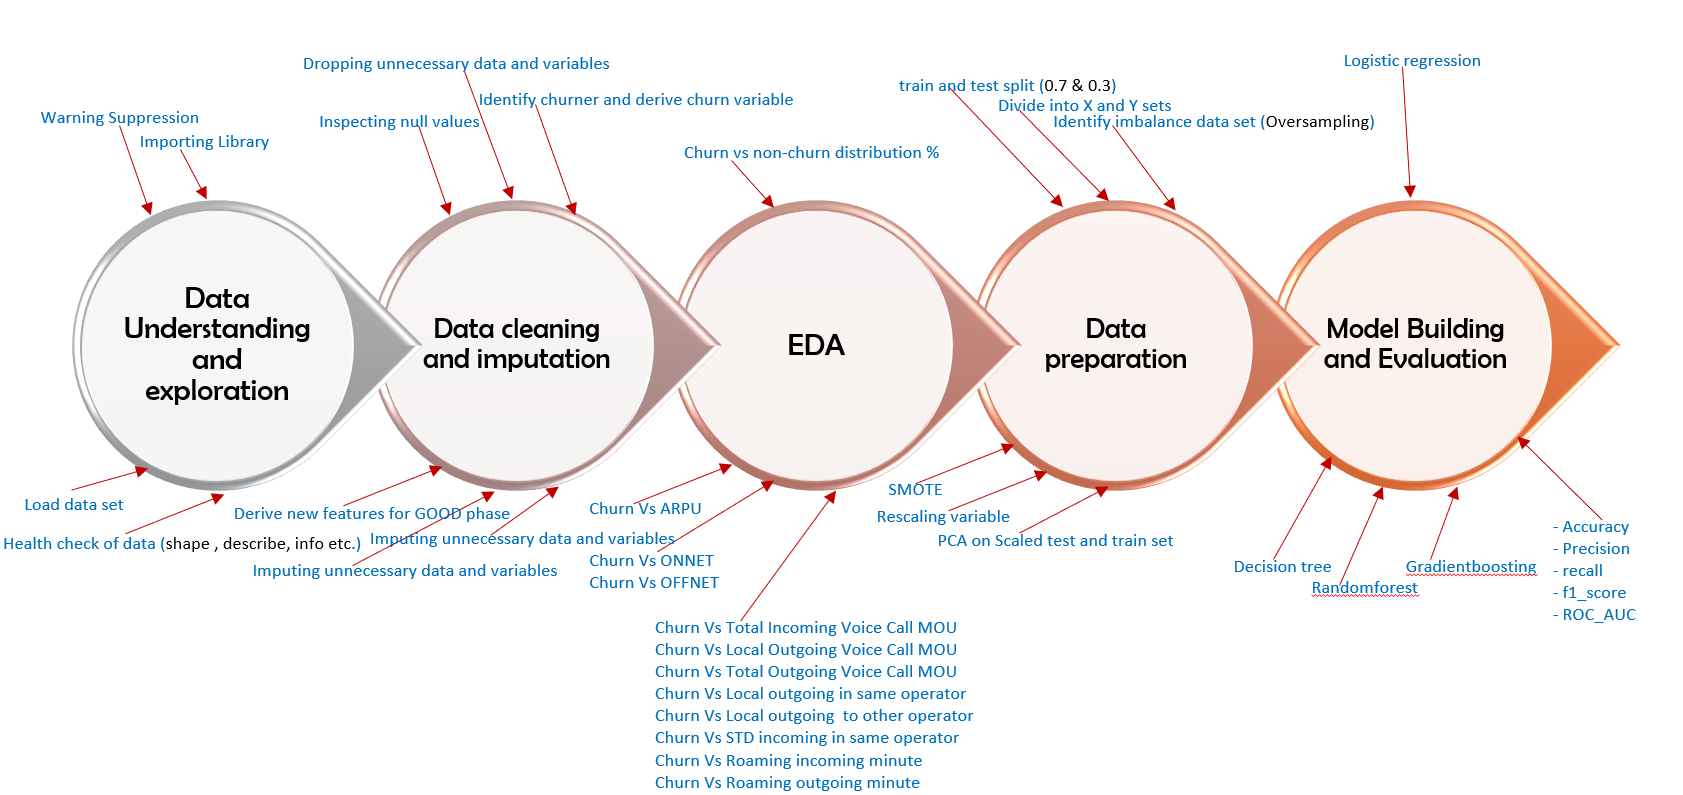

**To make it easy to read our code, we will create a function and re-use it for better readibility**
- Define a function to check the performance of all above models on test data
- To evaluate we will take below metrics on test data
- Accuracy
- Precision
- recall
- f1_score
- ROC_AUC

`This is ready made code from class notes which is handy to be used`

In [223]:
# function to Visualize Confusion Matrix and ROC Curve (train set)

def visualize_model_train(model_name, model_obj, df_train_pca, y_train_sample):
    #Plot confusion matrix for Model
    print("================================================================================")
    print(f"Confusion Matrix and ROC Curve of {model_name} Model on Train Data")
    print("================================================================================")    
    metrics.plot_confusion_matrix(model_obj, df_train_pca, y_train_sample, cmap="Greens")
    plt.show()
    #Plot ROC_AUC Curve for Model
    metrics.plot_roc_curve(model_obj, df_train_pca, y_train_sample)
    plt.show()

In [213]:
#Function will return a DataFrame with all the scores of metrics used.

def calculate_model_peformance(model_name, y_test, y_pred, pred_prob):
    print(f"{model_name} Model Performance Report on Test Data:")
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    precision = metrics.precision_score(y_test,y_pred)
    print(f"Precision: {precision}")
    recall = metrics.recall_score(y_test,y_pred)
    print(f"Recall: {recall}")
    f1_score = metrics.f1_score(y_test,y_pred)
    print(f"F1_score: {f1_score}")
    roc_auc = metrics.roc_auc_score(y_test,pred_prob)
    print(f"Roc_auc: {roc_auc}")
    
    return pd.DataFrame({"Model":[model_name], 
                         "accuracy":[accuracy],
                         "precision":[precision],
                         "recall":[recall],
                         "f1_score":[f1_score],
                         "roc_auc":[roc_auc]}) 

In [224]:
#Define a function to Visualize Confusion Matrix and ROC Curve of all above models on test data

def visualize_model_test(model_name, model_obj, df_test_pca, y_test):
    #Plot confusion matrix for Model
    print("================================================================================")
    print(f"Confusion Matrix and ROC Curve of {model_name} Model on Test Data")
    print("================================================================================")
    metrics.plot_confusion_matrix(model_obj, df_test_pca, y_test, cmap="OrRd")
    plt.show()
    #Plot ROC_AUC Curve for Model
    metrics.plot_roc_curve(model_obj, df_test_pca, y_test)    
    plt.show()

In [216]:
# Create a DataFrame which stores all test score for each model
metric_score_df = pd.DataFrame({"Model":[None],
                                "accuracy":[None],
                                "precision":[None],
                                "recall":[None],
                                "f1_score":[None],
                                "roc_auc":[None]})

## <font color="maroon">1. Logistic Regression using PCA</font>

In [218]:
#Instantiate logistic regression
lr = LogisticRegression(random_state=42)

#We will use PCA data as input
lr.fit(tel_train_pca_final, y_train_resample)

#Check CV Score
cv_score = cross_val_score(lr, tel_train_pca_final, y_train_resample, cv=4, scoring='f1_micro')
print(f"Cross validation score: {cv_score}")

Cross validation score: [0.82744692 0.83925427 0.83664802 0.8309509 ]


In [219]:
#Prediction on PCA test data
y_pred_lr = lr.predict(tel_test_pca_final)

#check predict probability on pca data
pred_prob = lr.predict_proba(tel_test_pca_final)

In [220]:
#check various scores on test data for Logistics Regression Model
df1 = calculate_model_peformance("Logistic Regression", y_test, y_pred_lr, pred_prob[:,1])

Logistic Regression Model Performance Report on Test Data:
Accuracy: 0.8227974669481168
Precision: 0.29360039081582806
Recall: 0.8013333333333333
F1_score: 0.42974615659635323
Roc_auc: 0.8766337817638267


Confusion Matrix and ROC Curve of Logistic Regression Model on Train Data


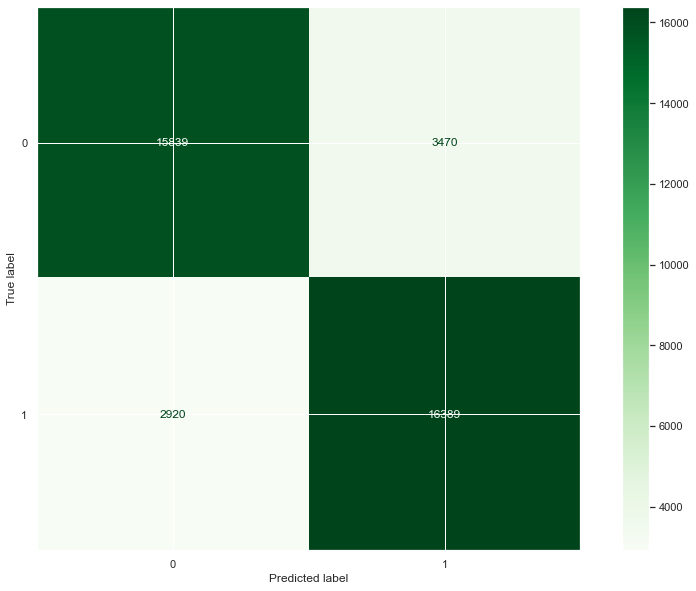

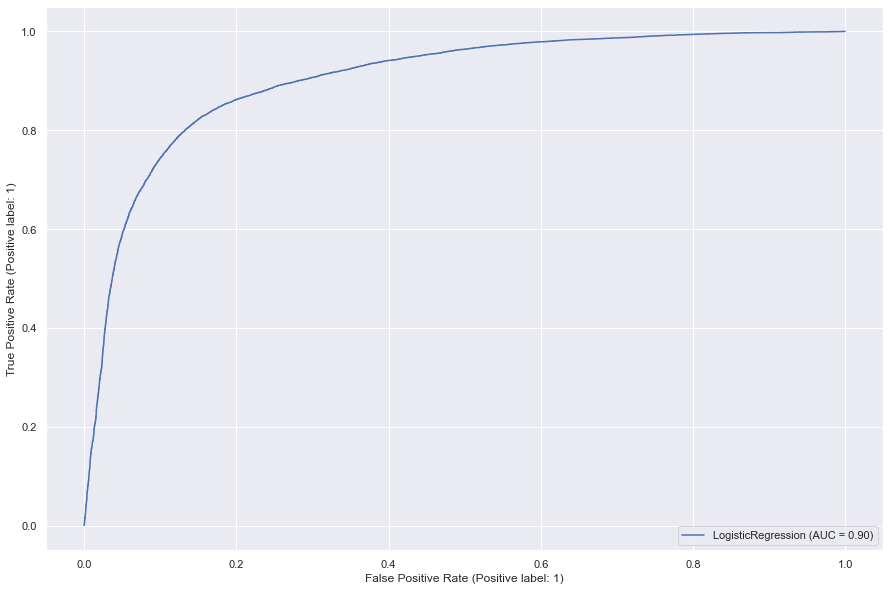

Confusion Matrix and ROC Curve of Logistic Regression Model on Test Data


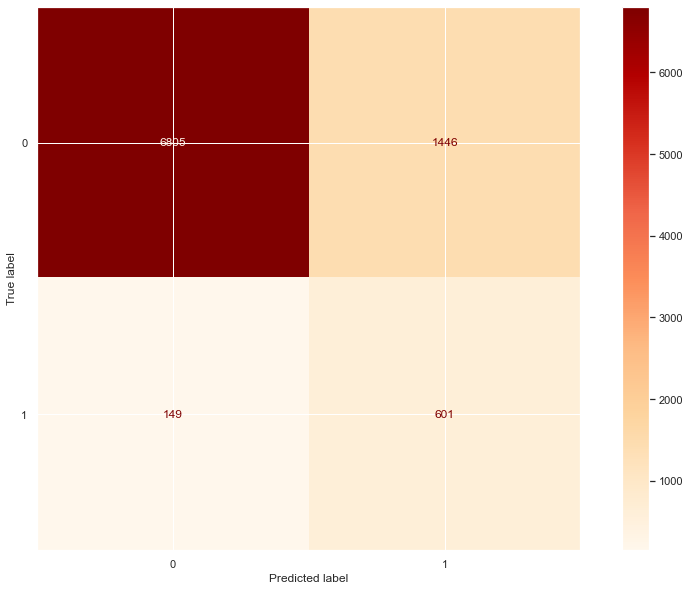

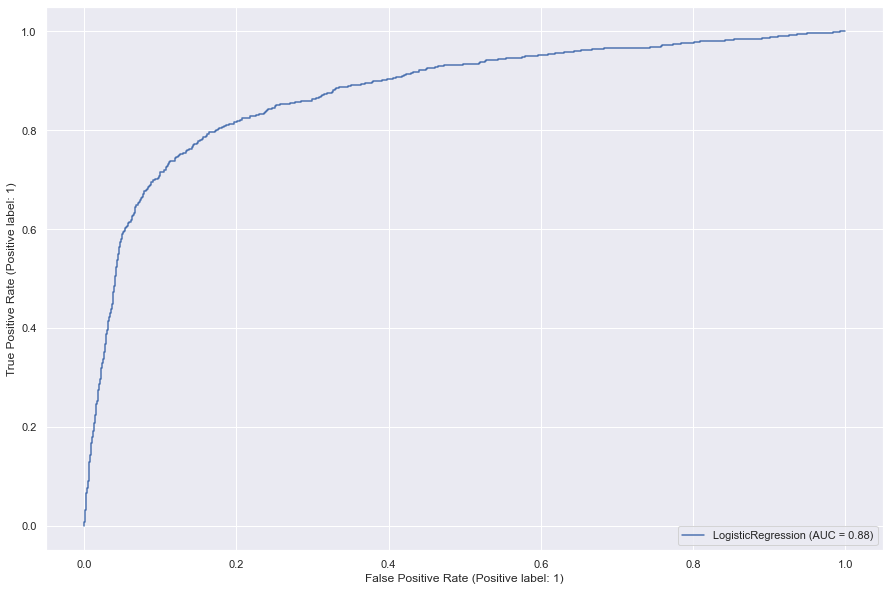

Model             accuracy            precision  \
0  Logistic Regression                 0.82                 0.29   
0  Logistic Regression                 0.82                 0.29   

                recall             f1_score              roc_auc  
0                 0.80                 0.43                 0.88  
0                 0.80                 0.43                 0.88

In [225]:
#Plot confusion matrix and ROC_AUC Curve for Logistic Regression Model on Train Data
visualize_model_train("Logistic Regression", lr, tel_train_pca_final, y_train_resample)

#Plot confusion matrix and ROC_AUC Curve for Logistic Regression Model on Test Data
visualize_model_test("Logistic Regression", lr, tel_test_pca_final, y_test)

#Generate a metric score for Logistic Regression
#Add the metric scores to dataframe for comparision with other model performance
metric_score_df = metric_score_df.dropna()
metric_score_df = metric_score_df.append(df1)
metric_score_df

## <font color="maroon">2. Decision Tree</font>

In [227]:
#Instantiate Decision tree with default parameter
teldt_obj = DecisionTreeClassifier(random_state=42)

#We will be use balance data which is generated by SMOTE.
teldt_obj.fit(scaled_X_train, y_train_resample)

#Check CV Score
cv_score = cross_val_score(teldt_obj, scaled_X_train, y_train_resample, cv=4, scoring='f1_micro')
print(cv_score)

[0.88689798 0.92780943 0.92925212 0.92666252]


In [228]:
#check the default paramters 
teldt_obj.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

**Hyper-parameter tuning for the Decision Tree**

In [229]:
#Same parameter is going to use for all other models
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [4,5,10,20,50],
    'min_samples_split': [4,5,10,20,50]
}

In [232]:
start_time=time.time()
print("\nStart Time : ",  start_time ,"seconds")


Start Time :  1630509048.5009446 seconds


In [233]:
#Perform hyperparamter tuning with randomizedsearchcv
start_time=time.time()
print("\nStart Time : ", round(start_time,2),"seconds")

teldt_clf = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=teldt_clf,
                                   param_distributions=params,
                                   cv=4,
                                   n_jobs=-1, 
                                   verbose=1,
                                   scoring="f1_micro")

random_search.fit(scaled_X_train, y_train_resample)
end_time=time.time()
print("\nEnd Time   : ", round(end_time,2),"seconds")
print("\nTotal Time Taken: ", round(end_time-start_time,2),"seconds")


Start Time :  1630509122.02 seconds
Fitting 4 folds for each of 10 candidates, totalling 40 fits

End Time   :  1630509185.49 seconds

Total Time Taken:  63.46 seconds


In [236]:
#Best score and best estimator paramters
print("Best score:-       ", random_search.best_score_)
print("Best Estimator:-   ",random_search.best_estimator_)
print("Best Parameters:-  ",random_search.best_params_)

Best score:-        0.9110264263131486
Best Estimator:-    DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=5,
                       random_state=42)
Best Parameters:-   {'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 20}


In [237]:
pd.DataFrame(random_search.cv_results_).sort_values(by="rank_test_score")

mean_fit_time         std_fit_time      mean_score_time  \
9                 7.75                 0.08                 0.02   
7                 5.03                 0.02                 0.03   
5                 4.82                 0.03                 0.03   
1                 3.27                 0.01                 0.03   
4                 2.84                 0.03                 0.03   
6                 2.79                 0.02                 0.03   
2                 1.80                 0.03                 0.02   
0                 1.53                 0.03                 0.02   
3                 1.34                 0.04                 0.03   
8                 1.25                 0.01                 0.03   

        std_score_time param_min_samples_split param_min_samples_leaf  \
9                 0.00  5                       10                      
7                 0.00  4                       20                      
5                 0.00  20                      50                      
1                 0.00  4                       4                       
4                 0.00  20                      10                      
6                 0.00  50                      4                       
2                 0.00  20                      20                      
0                 0.00  20                      5                       
3                 0.00  50                      50                      
8                 0.02  10                      5                       

  param_max_depth  \
9  20               
7  10               
5  10               
1  5                
4  5                
6  5                
2  3                
0  2                
3  2                
8  2                

                                                               params  \
9  {'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 20}    
7  {'min_samples_split': 4, 'min_samples_leaf': 20, 'max_depth': 10}    
5  {'min_samples_split': 20, 'min_samples_leaf': 50, 'max_depth': 10}   
1  {'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 5}      
4  {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 5}    
6  {'min_samples_split': 50, 'min_samples_leaf': 4, 'max_depth': 5}     
2  {'min_samples_split': 20, 'min_samples_leaf': 20, 'max_depth': 3}    
0  {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 2}     
3  {'min_samples_split': 50, 'min_samples_leaf': 50, 'max_depth': 2}    
8  {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 2}     

     split0_test_score    split1_test_score    split2_test_score  \
9                 0.88                 0.92                 0.92   
7                 0.88                 0.91                 0.92   
5                 0.88                 0.90                 0.90   
1                 0.86                 0.88                 0.88   
4                 0.86                 0.88                 0.88   
6                 0.86                 0.88                 0.88   
2                 0.83                 0.86                 0.86   
0                 0.82                 0.83                 0.84   
3                 0.82                 0.83                 0.84   
8                 0.82                 0.83                 0.84   

     split3_test_score      mean_test_score       std_test_score  \
9                 0.92                 0.91                 0.02   
7                 0.91                 0.91                 0.01   
5                 0.90                 0.89                 0.01   
1                 0.88                 0.88                 0.01   
4                 0.88                 0.88                 0.01   
6                 0.88                 0.88                 0.01   
2                 0.85                 0.85                 0.01   
0                 0.83                 0.83                 0.01   
3                 0.83                 0.83                

**We identified best parameters for decision tree based on above hyper tunning data. So let's run the Decision Tree again with only best parameters on Train DataSet.**

In [238]:
teldt_clf = DecisionTreeClassifier(max_leaf_nodes=6, 
                                min_samples_leaf=random_search.best_params_.get('min_samples_leaf'), 
                                min_samples_split=random_search.best_params_.get('min_samples_split'), random_state=42)
teldt_clf.fit(scaled_X_train, y_train_resample)

DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=10,
                       min_samples_split=5, random_state=42)

In [239]:
#perform the prediction 
y_pred_dt = teldt_clf.predict(scaled_X_test)

#Perform the prediction probability
pred_prob = teldt_clf.predict_proba(scaled_X_test)

In [240]:
#check various scores on test data for Decision Tree Model
df2 = calculate_model_peformance("Decision Tree", y_test, y_pred_dt, pred_prob[:,1])

Decision Tree Model Performance Report on Test Data:
Accuracy: 0.8629041217642485
Precision: 0.3483709273182957
Recall: 0.7413333333333333
F1_score: 0.47399829497016194
Roc_auc: 0.8647310629014665


Confusion Matrix and ROC Curve of Decision Tree Model on Train Data


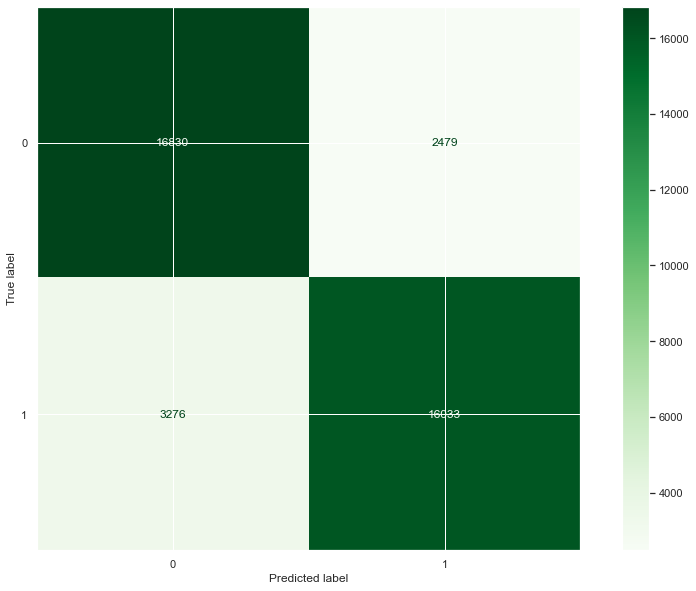

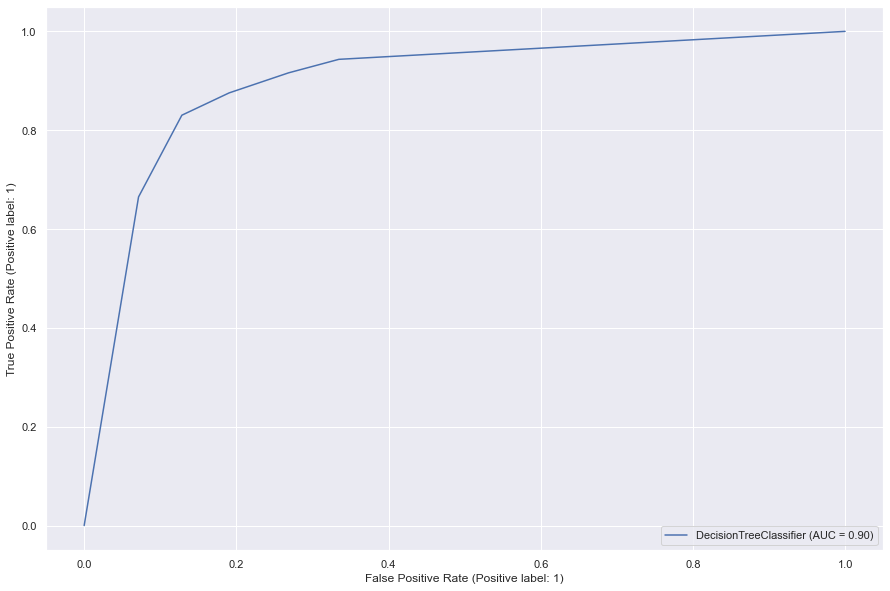

Confusion Matrix and ROC Curve of Decision Tree Model on Test Data


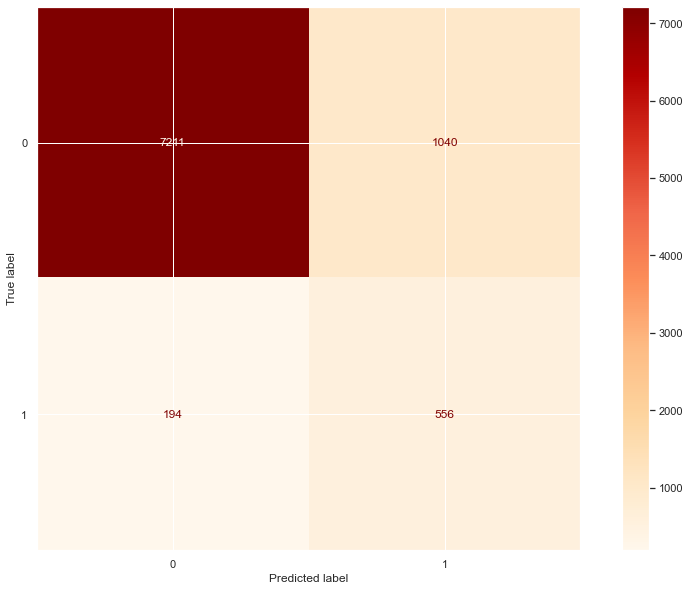

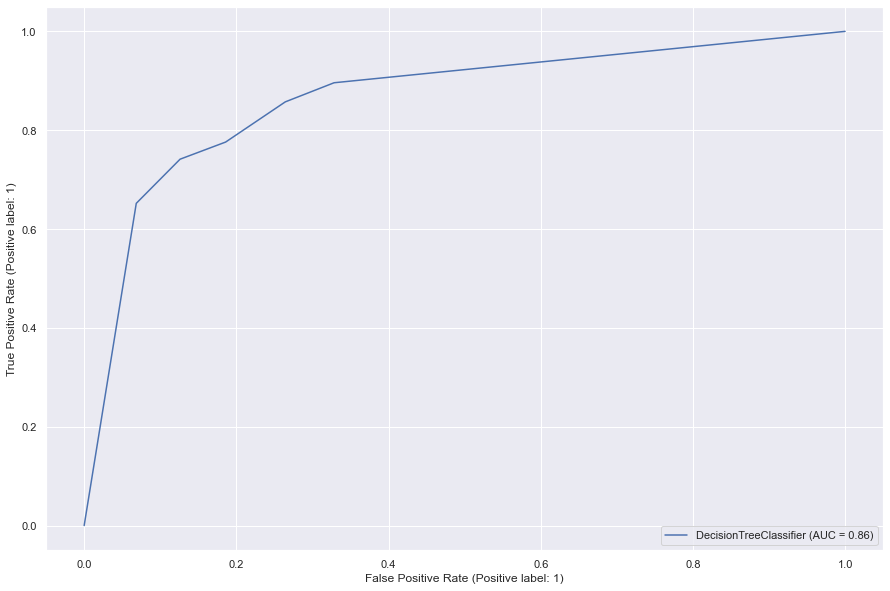

Model             accuracy            precision  \
0  Logistic Regression                 0.82                 0.29   
0  Decision Tree                       0.86                 0.35   

                recall             f1_score              roc_auc  
0                 0.80                 0.43                 0.88  
0                 0.74                 0.47                 0.86

In [241]:
#Plot confusion matrix and ROC_AUC Curve for Decision Tree Model on Train Data
visualize_model_train("Decision Tree", teldt_clf, scaled_X_train, y_train_resample)

#Plot confusion matrix and ROC_AUC Curve for Decision Tree Model on Test Data
visualize_model_test("Decision Tree", teldt_clf, scaled_X_test, y_test)

#Add the score to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(df2)
metric_score_df.dropna(inplace=True)
metric_score_df.drop_duplicates(inplace=True)
metric_score_df

## <font color="maroon">3. Random Forest</font>

In [242]:
#Instantiate Random Forest with default parameter
telrf_obj = RandomForestClassifier(random_state=42)

#We will be use balance data which is generated by SMOTE.
telrf_obj.fit(scaled_X_train, y_train_resample)

#Check CV Score
cv_score = cross_val_score(telrf_obj, scaled_X_train, y_train_resample, cv=4, scoring='f1_micro')
print(cv_score)

[0.95007768 0.97058519 0.97047856 0.96602445]


In [243]:
#check the default paramters 
telrf_obj.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Hyper-parameter tuning for the Random Forest

In [244]:
#Perform hyperparamter tuning with randomizedsearchcv
start_time=time.time()
print("\nStart Time :", round(start_time,2),"seconds")

telrf_clf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=telrf_clf,
                                   param_distributions=params,
                                   cv=4,
                                   n_jobs=-1, 
                                   verbose=1,
                                   scoring="f1_micro")

random_search.fit(scaled_X_train, y_train_resample)
end_time=time.time()
print("\nEnd Time  : ", round(end_time,2),"seconds")
print("\nTotal Time Taken : ", round(end_time-start_time,2),"seconds")


Start Time : 1630510442.05 seconds
Fitting 4 folds for each of 10 candidates, totalling 40 fits

End Time  :  1630510743.57 seconds

Total Time Taken :  301.52 seconds


In [245]:
#Best score and best estimator paramters
print("Best score:-       ", random_search.best_score_)
print("Best Estimator:-   ",random_search.best_estimator_)
print("Best Parameters:-  ",random_search.best_params_)

Best score:-        0.9446892973313734
Best Estimator:-    RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=4,
                       random_state=42)
Best Parameters:-   {'min_samples_split': 4, 'min_samples_leaf': 10, 'max_depth': 20}


In [246]:
pd.DataFrame(random_search.cv_results_).sort_values(by="rank_test_score")

mean_fit_time         std_fit_time      mean_score_time  \
0                43.33                 0.15                 0.51   
3                31.84                 0.14                 0.42   
4                40.78                 0.38                 0.44   
1                30.52                 0.05                 0.35   
6                34.83                 0.20                 0.40   
5                16.20                 0.09                 0.21   
7                15.45                 0.06                 0.22   
8                11.80                 0.10                 0.21   
2                 9.89                 0.06                 0.18   
9                 8.83                 0.13                 0.15   

        std_score_time param_min_samples_split param_min_samples_leaf  \
0                 0.03  4                       10                      
3                 0.03  4                       4                       
4                 0.02  50                      5                       
1                 0.02  20                      4                       
6                 0.04  20                      50                      
5                 0.02  5                       50                      
7                 0.03  20                      50                      
8                 0.09  10                      50                      
2                 0.02  10                      10                      
9                 0.03  50                      5                       

  param_max_depth  \
0  20               
3  10               
4  20               
1  10               
6  20               
5  5                
7  5                
8  3                
2  3                
9  2                

                                                               params  \
0  {'min_samples_split': 4, 'min_samples_leaf': 10, 'max_depth': 20}    
3  {'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 10}     
4  {'min_samples_split': 50, 'min_samples_leaf': 5, 'max_depth': 20}    
1  {'min_samples_split': 20, 'min_samples_leaf': 4, 'max_depth': 10}    
6  {'min_samples_split': 20, 'min_samples_leaf': 50, 'max_depth': 20}   
5  {'min_samples_split': 5, 'min_samples_leaf': 50, 'max_depth': 5}     
7  {'min_samples_split': 20, 'min_samples_leaf': 50, 'max_depth': 5}    
8  {'min_samples_split': 10, 'min_samples_leaf': 50, 'max_depth': 3}    
2  {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 3}    
9  {'min_samples_split': 50, 'min_samples_leaf': 5, 'max_depth': 2}     

     split0_test_score    split1_test_score    split2_test_score  \
0                 0.93                 0.95                 0.95   
3                 0.92                 0.95                 0.95   
4                 0.92                 0.95                 0.95   
1                 0.92                 0.94                 0.94   
6                 0.90                 0.92                 0.93   
5                 0.87                 0.89                 0.90   
7                 0.87                 0.89                 0.90   
8                 0.85                 0.87                 0.87   
2                 0.85                 0.87                 0.87   
9                 0.83                 0.84                 0.83   

     split3_test_score      mean_test_score       std_test_score  \
0                 0.95                 0.94                 0.01   
3                 0.94                 0.94                 0.01   
4                 0.94                 0.94                 0.01   
1                 0.94                 0.94                 0.01   
6                 0.92                 0.92                 0.01   
5                 0.89                 0.89                 0.01   
7                 0.89                 0.89                 0.01   
8                 0.87                 0.87                 0.01   
2                 0.87                 0.86                

**We identified best parameters for random forest based on above hyper tunning data. So let's run the Random forest again with only best parameters on Train DataSet.**

In [247]:
telrf_clf = RandomForestClassifier(max_leaf_nodes=6, 
                                min_samples_leaf=random_search.best_params_.get('min_samples_leaf'), 
                                min_samples_split=random_search.best_params_.get('min_samples_split'), random_state=42)
telrf_clf.fit(scaled_X_train, y_train_resample)

RandomForestClassifier(max_leaf_nodes=6, min_samples_leaf=10,
                       min_samples_split=4, random_state=42)

In [248]:
#perform the prediction 
y_pred_dt = telrf_clf.predict(scaled_X_test)

#Perform the prediction probability
pred_prob = telrf_clf.predict_proba(scaled_X_test)

In [249]:
#check various scores on test data for Random Forest Model
df3 = calculate_model_peformance("Random Forest", y_test, y_pred_dt, pred_prob[:,1])

Random Forest Model Performance Report on Test Data:
Accuracy: 0.8993445172758583
Precision: 0.44
Recall: 0.7626666666666667
F1_score: 0.5580487804878048
Roc_auc: 0.9114916979760028


Confusion Matrix and ROC Curve of Random Forest Model on Train Data


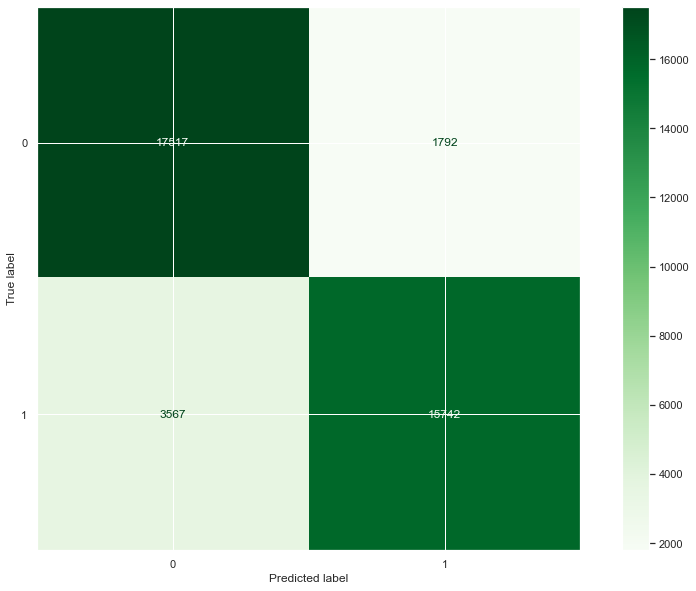

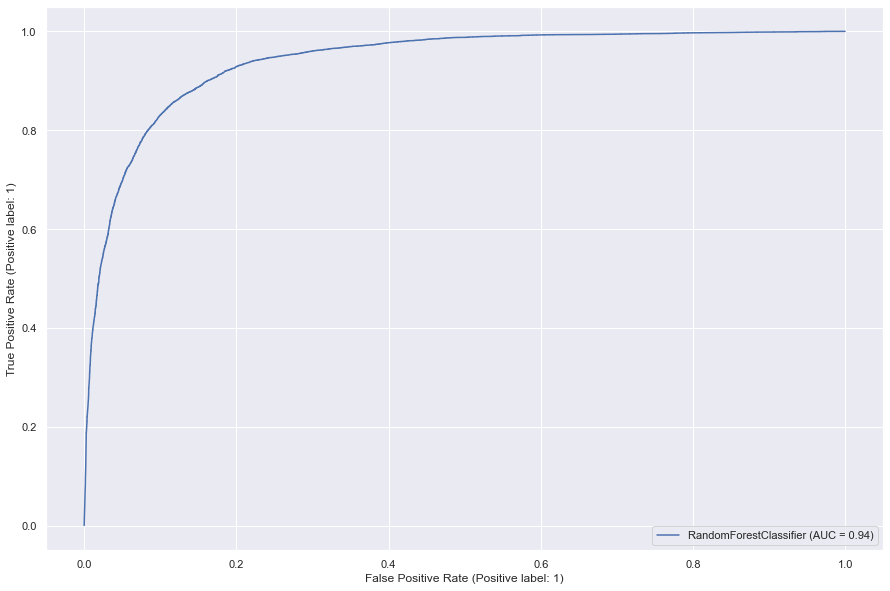

Confusion Matrix and ROC Curve of Random Forest Model on Test Data


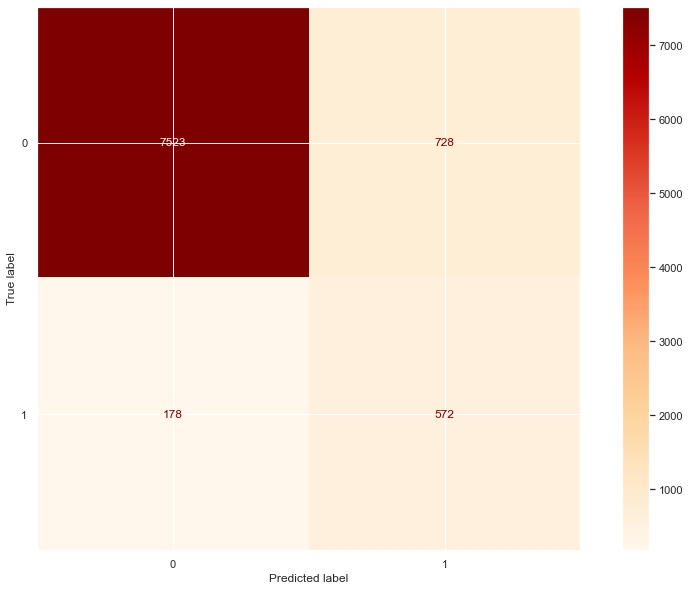

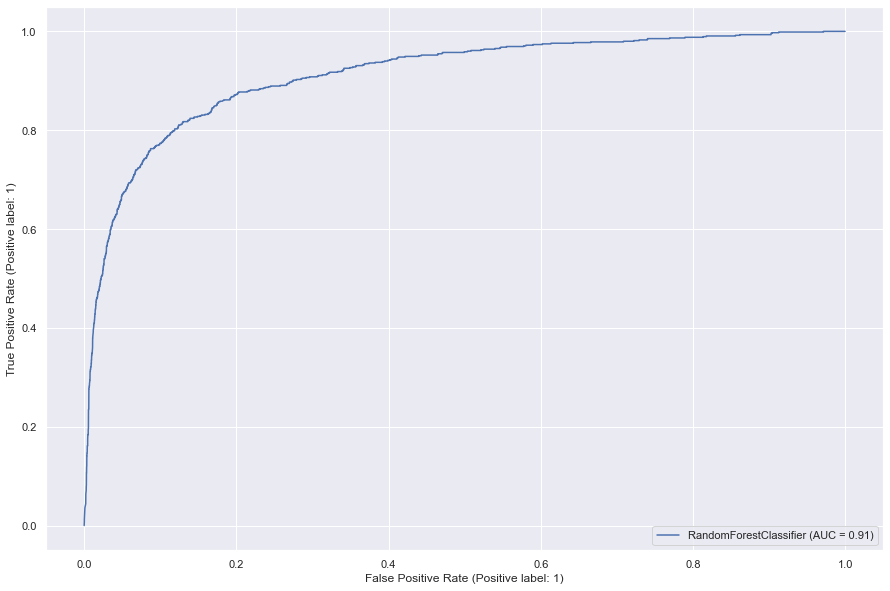

Model             accuracy            precision  \
0  Logistic Regression                 0.82                 0.29   
0  Decision Tree                       0.86                 0.35   
0  Random Forest                       0.90                 0.44   

                recall             f1_score              roc_auc  
0                 0.80                 0.43                 0.88  
0                 0.74                 0.47                 0.86  
0                 0.76                 0.56                 0.91

In [250]:
#Plot confusion matrix and ROC_AUC Curve for Random Forest Model on Train Data
visualize_model_train("Random Forest", telrf_clf, scaled_X_train, y_train_resample)

#Plot confusion matrix and ROC_AUC Curve for Random Forest Model on Test Data
visualize_model_test("Random Forest", telrf_clf, scaled_X_test, y_test)

#Add the score to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(df3)
metric_score_df.dropna(inplace=True)
metric_score_df.drop_duplicates(inplace=True)
metric_score_df

## <font color="maroon">4. Gradient Boosting</font>

In [252]:
#Instantiate Gradient Boosting with default parameter
telgb_obj = GradientBoostingClassifier(random_state=42)

#We will be use balance data which is generated by SMOTE.
telgb_obj.fit(scaled_X_train, y_train_resample)

#Check CV Score
cv_score = cross_val_score(telgb_obj, scaled_X_train, y_train_resample, cv=4, scoring='f1_micro')
print(cv_score)

[0.90108752 0.94634904 0.94603273 0.94261446]


In [254]:
#check the default paramters 
telgb_obj.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### Hyper-parameter tuning for Gradient Boosting

In [255]:
#Perform hyperparamter tuning with randomizedsearchcv
start_time=time.time()
print("\nStart Time  :", round(start_time,2),"seconds")

telgb_clf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=telgb_clf,
                                   param_distributions=params,
                                   cv=4,
                                   n_jobs=-1, 
                                   verbose=1,
                                   scoring="f1_micro")

random_search.fit(scaled_X_train, y_train_resample)
end_time=time.time()
print("\nEnd time     : ", round(end_time,2),"seconds")
print("\nTotal Time Taken :", round(end_time-start_time,2),"seconds")


Start Time  : 1630511583.31 seconds
Fitting 4 folds for each of 10 candidates, totalling 40 fits

End time     :  1630511831.68 seconds

Total Time Taken : 248.36 seconds


In [256]:
#Best score and best estimator paramters
print("Best score:-       ", random_search.best_score_)
print("Best Estimator:-   ",random_search.best_estimator_)
print("Best Parameters:-  ",random_search.best_params_)

Best score:-        0.9446892973313734
Best Estimator:-    RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                       random_state=42)
Best Parameters:-   {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 20}


In [257]:
pd.DataFrame(random_search.cv_results_).sort_values(by="rank_test_score")

mean_fit_time         std_fit_time      mean_score_time  \
8                36.01                 0.13                 0.45   
4                26.97                 0.10                 0.37   
6                32.99                 0.16                 0.42   
0                28.56                 0.22                 0.40   
2                14.59                 0.07                 0.21   
5                14.63                 0.18                 0.20   
1                14.58                 0.07                 0.20   
9                14.52                 0.12                 0.21   
7                 9.31                 0.08                 0.16   
3                 6.65                 0.03                 0.16   

        std_score_time param_min_samples_split param_min_samples_leaf  \
8                 0.03  10                      10                      
4                 0.03  5                       4                       
6                 0.01  20                      20                      
0                 0.03  4                       50                      
2                 0.02  20                      5                       
5                 0.02  50                      4                       
1                 0.02  20                      50                      
9                 0.01  50                      50                      
7                 0.01  10                      50                      
3                 0.02  5                       5                       

  param_max_depth  \
8  20               
4  10               
6  20               
0  20               
2  5                
5  5                
1  5                
9  5                
7  3                
3  2                

                                                               params  \
8  {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 20}   
4  {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}     
6  {'min_samples_split': 20, 'min_samples_leaf': 20, 'max_depth': 20}   
0  {'min_samples_split': 4, 'min_samples_leaf': 50, 'max_depth': 20}    
2  {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 5}     
5  {'min_samples_split': 50, 'min_samples_leaf': 4, 'max_depth': 5}     
1  {'min_samples_split': 20, 'min_samples_leaf': 50, 'max_depth': 5}    
9  {'min_samples_split': 50, 'min_samples_leaf': 50, 'max_depth': 5}    
7  {'min_samples_split': 10, 'min_samples_leaf': 50, 'max_depth': 3}    
3  {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 2}      

     split0_test_score    split1_test_score    split2_test_score  \
8                 0.93                 0.95                 0.95   
4                 0.92                 0.95                 0.95   
6                 0.91                 0.94                 0.94   
0                 0.90                 0.92                 0.93   
2                 0.87                 0.89                 0.90   
5                 0.87                 0.89                 0.90   
1                 0.87                 0.89                 0.90   
9                 0.87                 0.89                 0.90   
7                 0.85                 0.87                 0.87   
3                 0.83                 0.84                 0.83   

     split3_test_score      mean_test_score       std_test_score  \
8                 0.95                 0.94                 0.01   
4                 0.94                 0.94                 0.01   
6                 0.94                 0.93                 0.01   
0                 0.92                 0.92                 0.01   
2                 0.89                 0.89                 0.01   
5                 0.89                 0.89                 0.01   
1                 0.89                 0.89                 0.01   
9                 0.89                 0.89                 0.01   
7                 0.87                 0.87                

**We identified best parameters for Gradient Boosting based on above hyper tunning data. So let's run Gradient Boosting again with only best parameters on Train DataSet.**

In [258]:
telgb_clf = GradientBoostingClassifier(max_leaf_nodes=6, 
                                min_samples_leaf=random_search.best_params_.get('min_samples_leaf'), 
                                min_samples_split=random_search.best_params_.get('min_samples_split'), random_state=42)
telgb_clf.fit(scaled_X_train, y_train_resample)

GradientBoostingClassifier(max_leaf_nodes=6, min_samples_leaf=10,
                           min_samples_split=10, random_state=42)

In [259]:
#perform the prediction 
y_pred_gb = telgb_clf.predict(scaled_X_test)

#Perform the prediction probability
pred_prob = telgb_clf.predict_proba(scaled_X_test)

In [260]:
#check various scores on test data for Gradient Boosting Model
df4 = calculate_model_peformance("Gradient Boosting", y_test, y_pred_gb, pred_prob[:,1])

Gradient Boosting Model Performance Report on Test Data:
Accuracy: 0.9171203199644484
Precision: 0.5018315018315018
Recall: 0.7306666666666667
F1_score: 0.5950054288816504
Roc_auc: 0.91545889387145


Confusion Matrix and ROC Curve of Gradient Boosting Model on Train Data


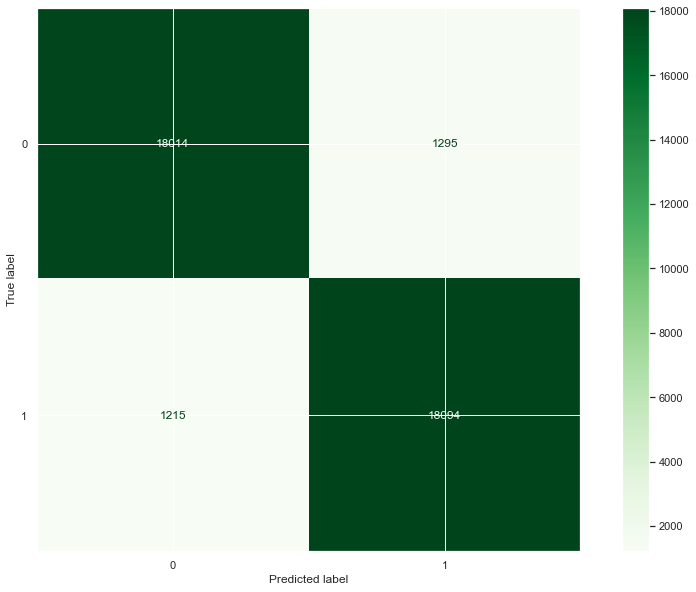

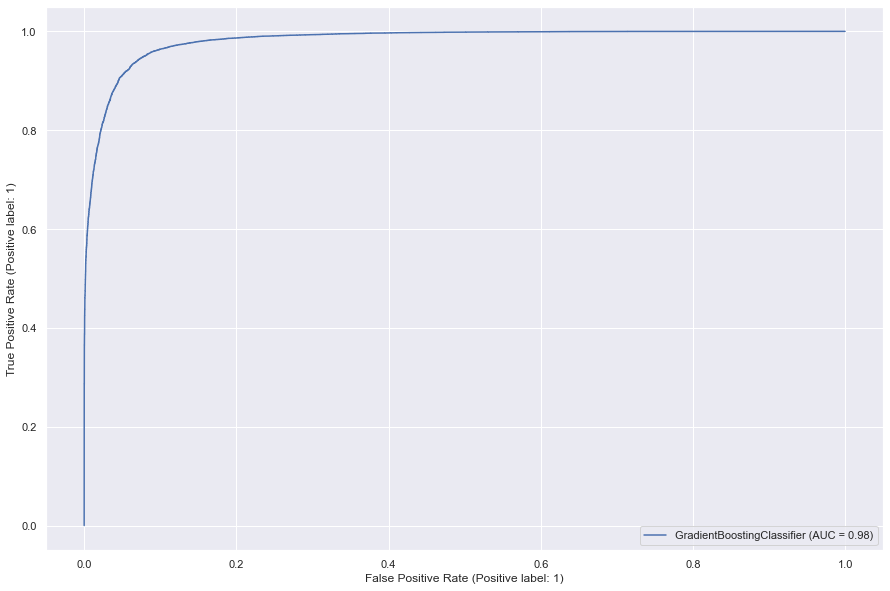

Confusion Matrix and ROC Curve of Gradient Boosting Model on Test Data


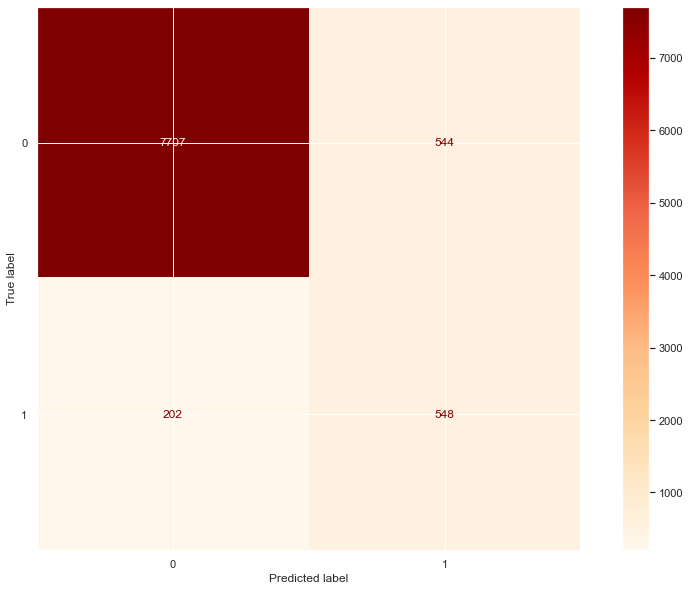

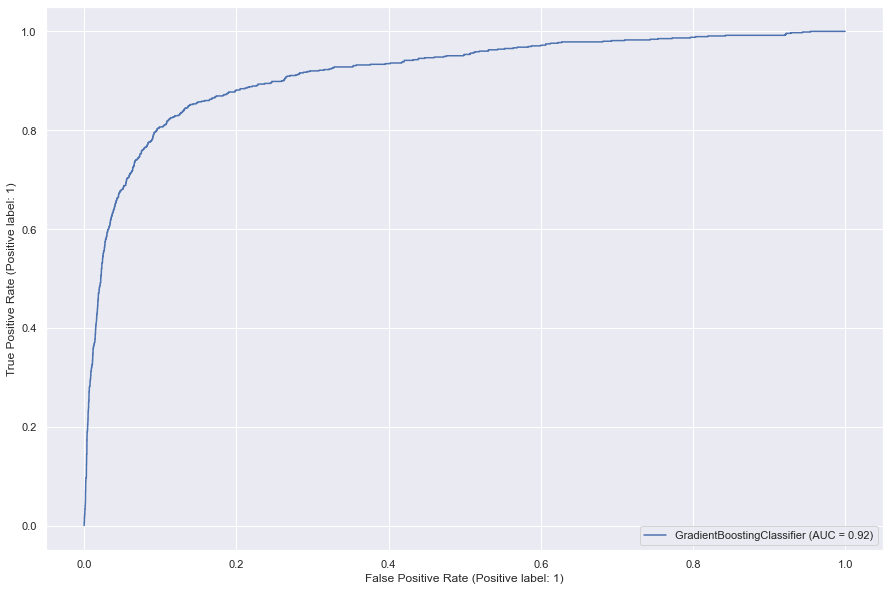

Model             accuracy            precision  \
0  Logistic Regression                 0.82                 0.29   
0  Decision Tree                       0.86                 0.35   
0  Random Forest                       0.90                 0.44   
0  Gradient Boosting                   0.92                 0.50   

                recall             f1_score              roc_auc  
0                 0.80                 0.43                 0.88  
0                 0.74                 0.47                 0.86  
0                 0.76                 0.56                 0.91  
0                 0.73                 0.60                 0.92

In [261]:
#Plot confusion matrix and ROC_AUC Curve for Gradient Boosting Model on Train Data
visualize_model_train("Gradient Boosting", telgb_clf, scaled_X_train, y_train_resample)

#Plot confusion matrix and ROC_AUC Curve for Gradient Boosting Model on Test Data
visualize_model_test("Gradient Boosting", telgb_clf, scaled_X_test, y_test)

#Add the score to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(df4)
metric_score_df.dropna(inplace=True)
metric_score_df.drop_duplicates(inplace=True)
metric_score_df

Based on above data, **Random Forest** look to be a best model from all other model metric data.
- Random Forest predict better on churn customers. It is having around `44% of precision`, `76% of recall` and `56% of f1_score` which is a balanced data with `accurancy 90%`.

## <font color="red">6.  Feature Importance and Predictions</font>
As we have selected Random Forest Model as best, so we'll use the same for feature selection and predictions.
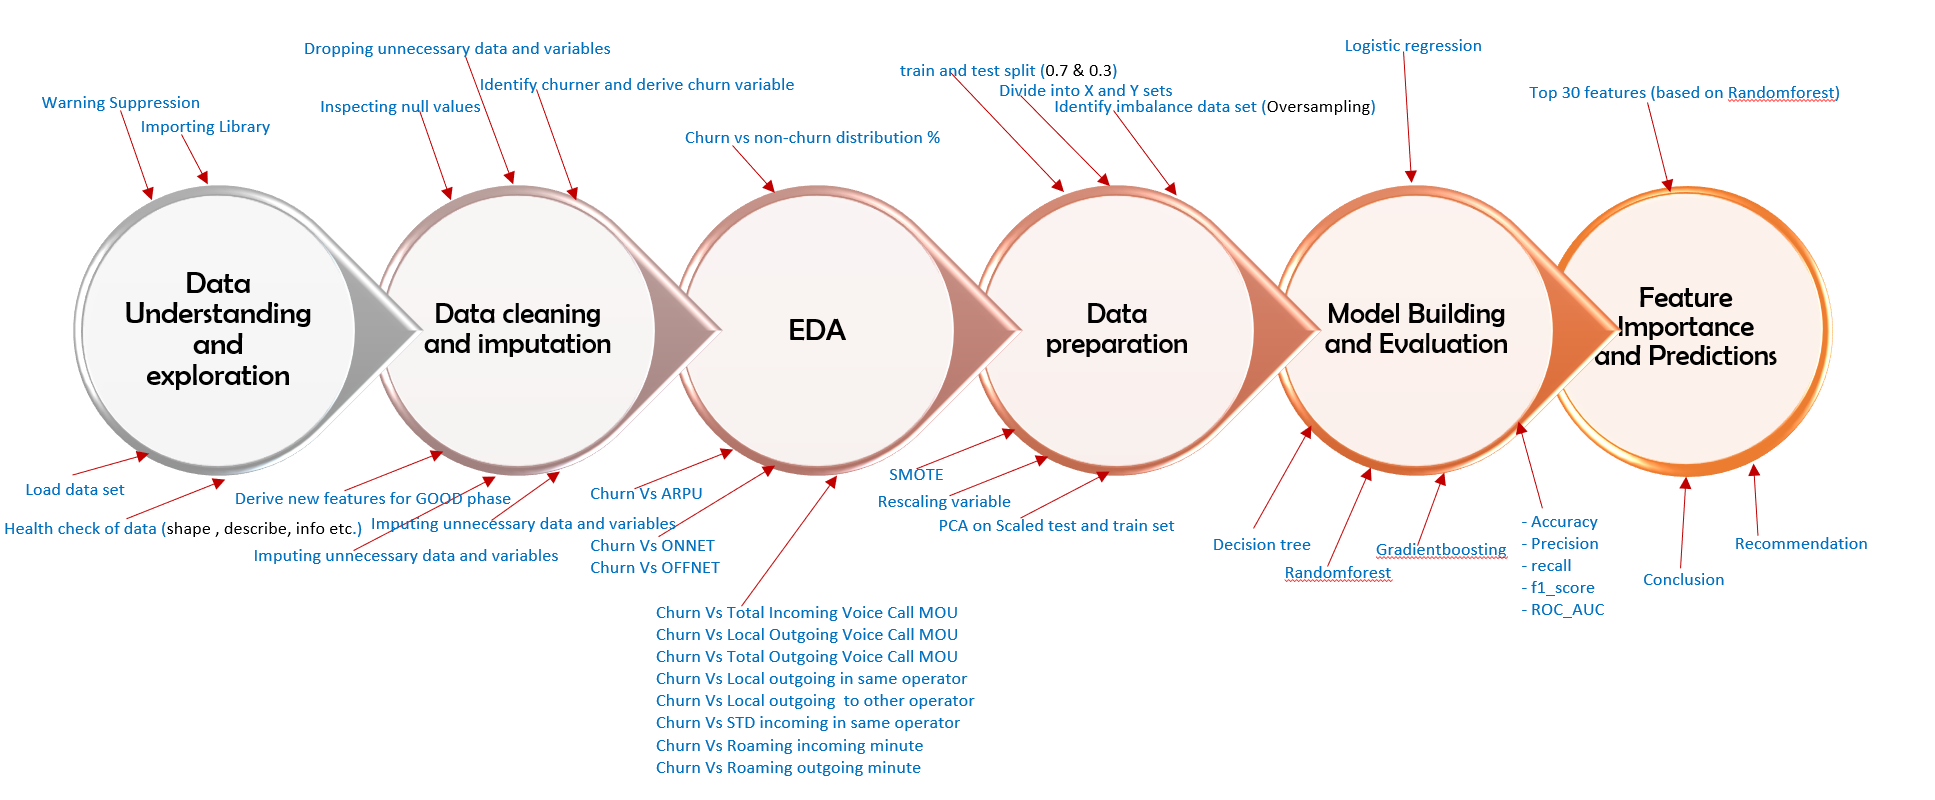

In [262]:
# Random forest model training
telrf_final = RandomForestClassifier(random_state=42)
telrf_final.fit(scaled_X_train, y_train_resample)

#perform the prediction 
y_pred = telrf_final.predict(scaled_X_test)

#Perform the prediction probability
pred_prob = telrf_final.predict_proba(scaled_X_test)

In [263]:
#check the performance on test data
calculate_model_peformance("Random Forest", y_test, y_pred, pred_prob[:,1])

Random Forest Model Performance Report on Test Data:
Accuracy: 0.9341184312854127
Precision: 0.5951515151515151
Recall: 0.6546666666666666
F1_score: 0.6234920634920634
Roc_auc: 0.9250550640326426


Model             accuracy            precision  \
0  Random Forest                 0.93                 0.60   

                recall             f1_score              roc_auc  
0                 0.65                 0.62                 0.93

Confusion Matrix and ROC Curve of Random Forest Model on Test Data


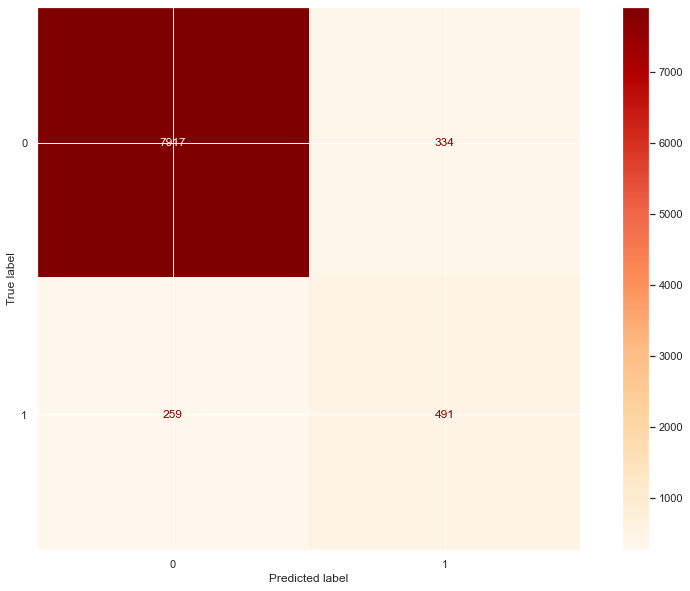

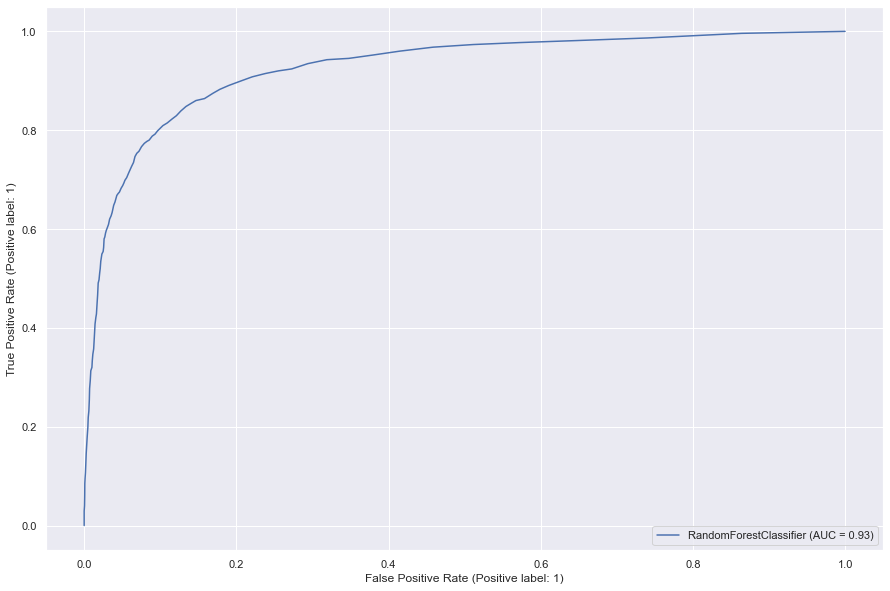

In [264]:
#Plot confusion matrix and ROC_AUC Curve for on Test Data
visualize_model_test("Random Forest", telrf_final, scaled_X_test, y_test)

In [265]:
#Create a Feature importance dataframe
imp_features = pd.DataFrame({"Features":X_train.columns,"Feature Importance":telrf_final.feature_importances_})

In [266]:
#check 30 important features
imp_predict = imp_features.sort_values(by="Feature Importance", ascending=False).head(30)
imp_predict

Features   Feature Importance
80   total_ic_mou_8                      0.05
65   loc_ic_mou_8                        0.04
14   roam_og_mou_8                       0.04
11   roam_ic_mou_8                       0.04
95   total_rech_amt_8                    0.04
59   loc_ic_t2m_mou_8                    0.03
134  fb_user_8                           0.03
2    arpu_8                              0.03
119  night_pck_user_8                    0.03
56   loc_ic_t2t_mou_8                    0.03
143  roam_og_mou_diff                    0.02
139  arpu_diff                           0.02
155  total_rech_amt_diff                 0.02
98   max_rech_amt_8                      0.02
107  max_rech_data_8                     0.02
20   loc_og_t2m_mou_8                    0.02
142  roam_ic_mou_diff                    0.02
53   total_og_mou_8                      0.02
101  last_day_rch_amt_8                  0.02
29   loc_og_mou_8                        0.01
17   loc_og_t2t_mou_8                    0.01
156  max_rech_amt_diff                   0.01
154  total_rech_num_diff                 0.01
153  total_ic_mou_diff                   0.01
8    offnet_mou_8                        0.01
104  total_rech_data_8                   0.01
110  av_rech_amt_data_8                  0.01
149  loc_ic_mou_diff                     0.01
148  total_og_mou_diff                   0.01
144  loc_og_mou_diff                     0.01

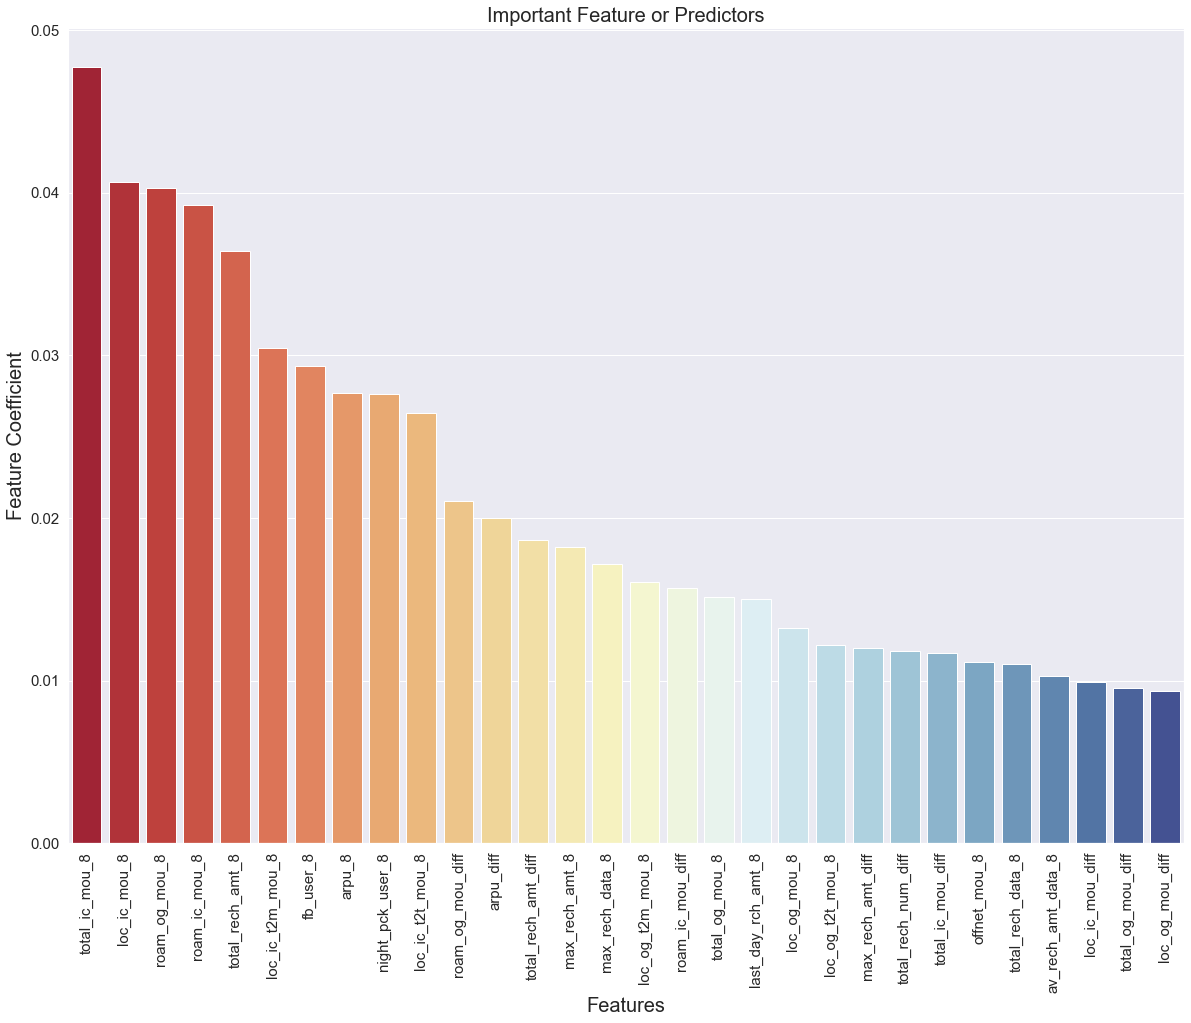

In [267]:
#Plot to show the feature importance
plt.figure(figsize=[20,15])
sns.barplot(x = "Features",y="Feature Importance",data=imp_predict,palette="RdYlBu")
plt.title("Important Feature or Predictors",size=20)
plt.xticks(rotation="vertical")
plt.ylabel("Feature Coefficient",size=20)
plt.xlabel("Features",size=20)
plt.tick_params(size=5,labelsize = 15)
plt.show()

## <font color="blue">Conclusion:</font>

TOp 30 important features are as shown in above graph.

Below are the few important factors which may affect the churn rate:
 - Average revenue per user more, those are likely to churn  (if they are not happy with the network).
 - Local calls minutes of usage (mou) also has impact on churn .
 - Incoming and Outgoing Calls on roaming for 8th month are very strong indicators of churn behaviour
 - There is large difference between recharge amount between 6th & 7th month, can also impact churn.
 - Users who are using more Outgoing and Incoming calls in Roaming, are likely to churn. Company must focus on them.
 - Users using night data packge can also be one the reason.

## <font color="green">Recommendation:</font>

To reduce the Churn Rate, company can try below options:
 - Provide additional internet service on recharge and along with more discounts.
 - Give discount or special offers based on the usage of customers.
 - Expand there network coverage for better quality and services.
 - Lower down their tariffs rates on call and internet packs.

## <font color="green">========================================================================== </font>
## <center> <font color="blue">                       End of the case study , thank you                     </font> </center>
## <font color="green">========================================================================== </font>